<a href="https://colab.research.google.com/github/URasanjali/Speech-Emotion-Recognition-Project-SER-/blob/main/Copy_of_Yet_another_copy_of_Untitled10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

Speech Emotion Recognition (SER) is an important artificial intelligence task that involves recognizing human emotions from audio signals. SER is important in human-computer interaction, virtual personal assistants, mental illness tracking, and customer service since it enables machines to understand and interact with users in a more natural and sympathetic manner.

The purpose of this project is to develop an emotion recognition AI model from speech using deep learning techniques. We use datasets like CREMA-D, SAVEE, TESS, and RAVDESS, which all have audio samples labeled with emotions like happiness, sadness, anger, and neutrality.

**Key technologies used:**

* Python for development

* Librosa for audio processing

* TensorFlow/Keras for deep learning

* Scikit-learn for preprocessing and evaluation

**Preprocessing techniques include:**

* Noise injection and time stretching for data augmentation

* MFCC (Mel-Frequency Cepstral Coefficients) extraction for audio feature representation

* One-hot encoding for labeling
Input reshaping to match LSTM requirements

We use an LSTM (Long Short-Term Memory) model because it is capable of learning temporal and sequential patterns in audio, which is crucial for understanding the flow and rhythm of speech.

The model is trained to classify emotions and evaluated using metrics like accuracy and F1-score.




# **Litarary servay**
Emotion recognition from speech is a significant field of human-computer interaction, seeking to classify emotions such as happiness, sadness, anger, and surprise from audio signals. MFCC (Mel-frequency cepstral coefficients) is also one of the most widely used feature extraction techniques, which effectively extracts the spectral features of speech, which are accountable for discriminating among emotions. Davis & Mermelstein (1980) originally formulated MFCC, and the efficiency of MFCC in emotion recognition was also encouraged by Zhao & Wu (2014).

For emotion classification, deep learning models, especially LSTM (Long Short-Term Memory) networks, have become popular since they are capable of learning long-term temporal dependencies in sequential data like speech. Hochreiter & Schmidhuber (1997) first introduced LSTM, and Yoon & Kim (2017) employed it to excellent effect for emotion detection.

Methods like Dropout and optimizers like Adam are also commonly used to improve the model's generalization and efficiency, with significant work from Goodfellow et al. (2016) and Kingma & Ba (2014).

In summary, the use of MFCC features together with LSTM networks and regularization methods has been proven to achieve superior performance in emotion recognition from audio and therefore can be a significant tool in many applications like healthcare, customer service, and entertainment.

# **Data set description**
We used four popular emotional speech datasets using kaggle: CREMA-D, RAVDESS, SAVEE, and TESS. These databases contain thousands of audio samples in which actors read sentences with different emotions such as anger, happiness, sadness, fear, and neutral. The data is captured in good quality.wav files and contains both female and male speakers. These varied and well-labeled databases are extensively used for system training and testing of speech emotion recognition.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display

# to play the audio files
from IPython.display import Audio
from sklearn.metrics import f1_score


from keras.callbacks import ModelCheckpoint
from keras.callbacks import LearningRateScheduler
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from collections.abc import Iterable

from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, BatchNormalization
from keras import layers, callbacks

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
Root_dir = '/content/drive/MyDrive/DataSet'


In [ ]:
Crema_path = Root_dir + "/Crema/"

In [ ]:
print("CREMA-D exists:", os.path.exists(Crema_path))

CREMA-D exists: True


In [ ]:
Crema_dir_list = os.listdir(Crema_path)

In [ ]:
Ex_Crema_dir_list = Crema_dir_list[:15]
Ex_Crema_dir_list

['1079_TIE_FEA_XX.wav',
 '1080_IEO_DIS_MD.wav',
 '1079_WSI_SAD_XX.wav',
 '1081_IOM_FEA_XX.wav',
 '1080_IOM_HAP_XX.wav',
 '1081_ITH_SAD_XX.wav',
 '1081_IEO_HAP_MD.wav',
 '1080_TSI_HAP_XX.wav',
 '1080_IWL_FEA_XX.wav',
 '1080_MTI_SAD_XX.wav',
 '1081_ITS_FEA_XX.wav',
 '1081_IEO_ANG_HI.wav',
 '1080_TSI_FEA_XX.wav',
 '1079_ITH_FEA_XX.wav',
 '1080_IWW_SAD_XX.wav']

In [ ]:
emotions_crema = []
paths_crema = []

for it in Crema_dir_list:
    # storing file paths
    paths_crema.append(Crema_path + it)
    # storing file emotions
    part = it.split('_')
    if part[2] == 'SAD':
        emotions_crema.append('sad')
    elif part[2] == 'ANG':
        emotions_crema.append('angry')
    elif part[2] == 'DIS':
        emotions_crema.append('disgust')
    elif part[2] == 'FEA':
        emotions_crema.append('fear')
    elif part[2] == 'HAP':
        emotions_crema.append('happy')
    elif part[2] == 'NEU':
        emotions_crema.append('neutral')
    else:
        emotions_crema.append('Unknown')

# dataframe for emotion of files
emotions_crema_df = pd.DataFrame(emotions_crema, columns=['Emotions'])

# dataframe for path of files.
path_crema_df = pd.DataFrame(paths_crema, columns=['Path'])
Crema_df = pd.concat([emotions_crema_df, path_crema_df], axis=1)
print(Crema_df.shape)
Crema_df.head().style.set_properties(**{'background-color': '#9490ff',
                           'color': 'black',
                           'border-color': 'black'})

(7430, 2)


In [ ]:
[Crema_df["Emotions"].unique().tolist() for i in Crema_df.columns]

[['fear', 'disgust', 'sad', 'happy', 'angry', 'neutral'],
 ['fear', 'disgust', 'sad', 'happy', 'angry', 'neutral']]

In [ ]:
font1 = {'family': 'serif', 'color': 'blue', 'size': 30}  # Generic serif font
font2 = {'family': 'sans-serif', 'color': 'blue', 'size': 20}  # Generic sans-serif
font3 = {'family': 'monospace', 'color': 'blue', 'size': 10}  # Generic monospace

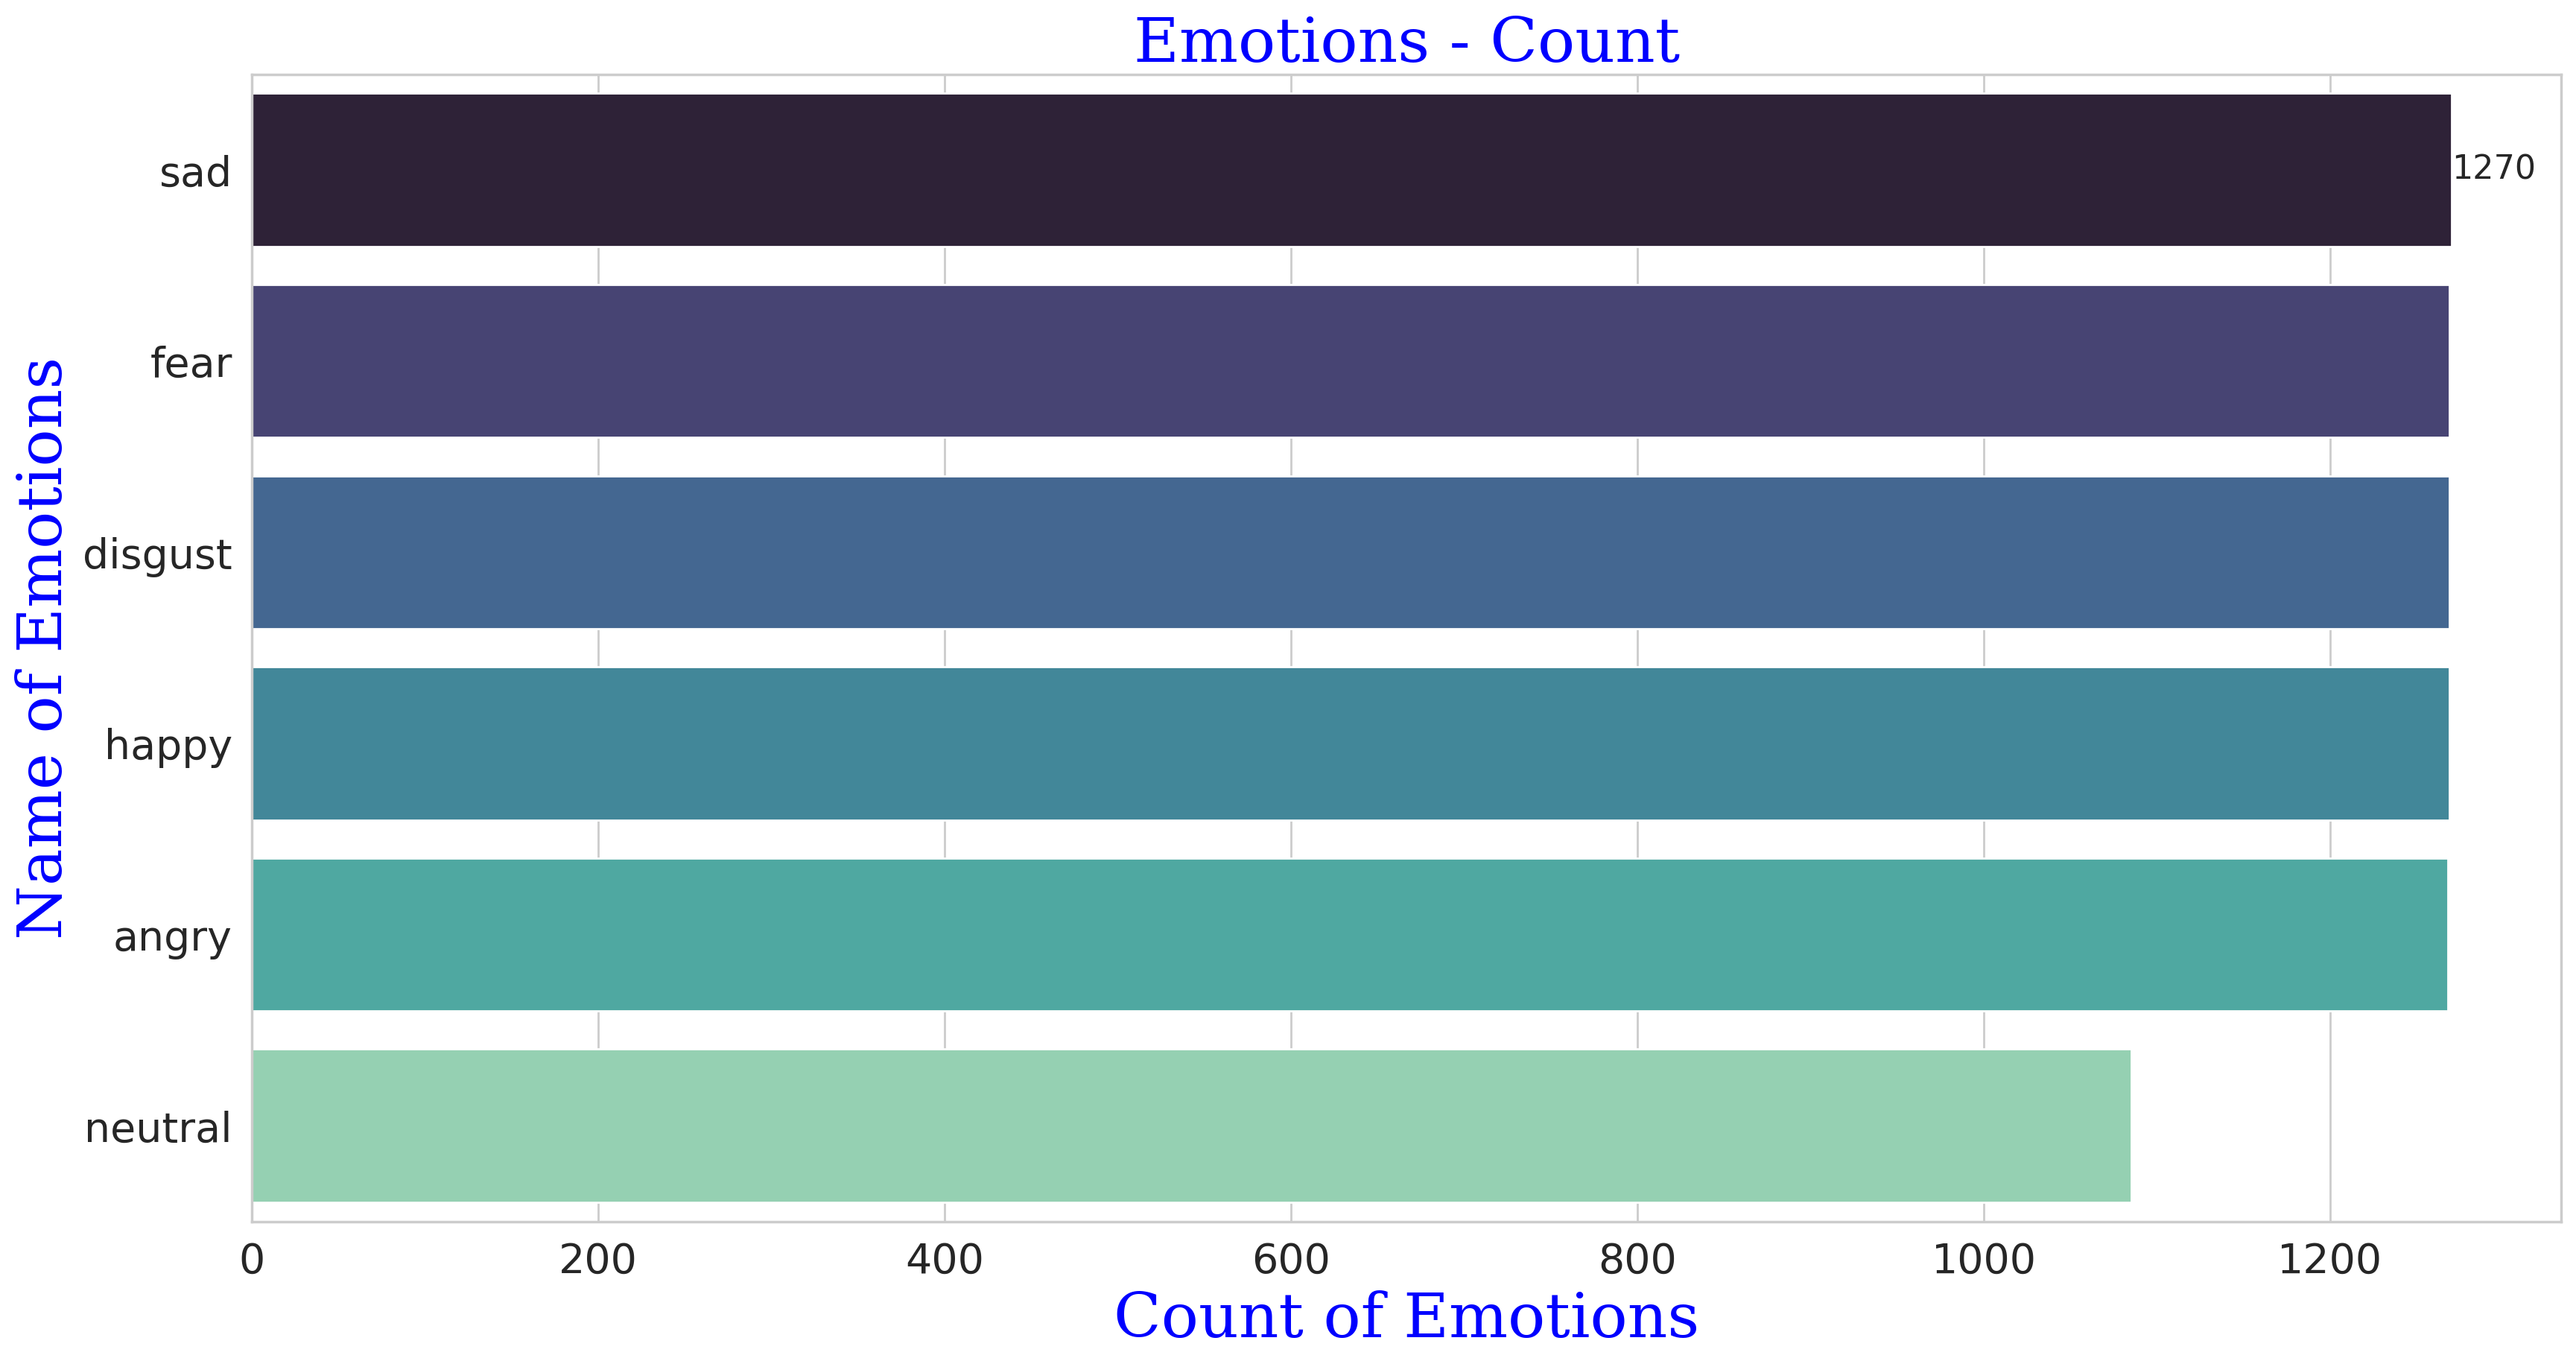

In [ ]:
sns.set(style="whitegrid", color_codes=True)
plt.figure(figsize=(20,10),dpi=200)
Count_emotion = Crema_df['Emotions'].value_counts()[:]
ax = sns.barplot(x= Count_emotion, y= Count_emotion.index, palette="mako")
ax.bar_label(ax.containers[0],fontsize=16)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("Name of Emotions", fontdict= font1)
plt.xlabel("Count of Emotions", fontdict= font1)
plt.title("Emotions - Count", fontdict= font1)
plt.show()

In [ ]:
batch_size = 100  # Process 100 files at a time
audio_arrays = []

for i, path in enumerate(Crema_df['Path']):
    try:
        y, sr = librosa.load(path, sr=44100)
        audio_arrays.append(y)

        # Print progress
        if (i+1) % batch_size == 0:
            print(f"Processed {i+1}/{len(Crema_df)} files")

    except Exception as e:
        print(f"Error loading {path}: {str(e)}")
        audio_arrays.append(None)  # Or np.nan

Crema_df['Arrays'] = audio_arrays

Processed 100/7430 files
Processed 200/7430 files
Processed 300/7430 files
Processed 400/7430 files
Processed 500/7430 files
Processed 600/7430 files
Processed 700/7430 files
Processed 800/7430 files
Processed 900/7430 files
Processed 1000/7430 files
Processed 1100/7430 files
Processed 1200/7430 files
Processed 1300/7430 files
Processed 1400/7430 files
Processed 1500/7430 files
Processed 1600/7430 files
Processed 1700/7430 files
Processed 1800/7430 files
Processed 1900/7430 files
Processed 2000/7430 files
Processed 2100/7430 files
Processed 2200/7430 files
Processed 2300/7430 files
Processed 2400/7430 files
Processed 2500/7430 files
Processed 2600/7430 files
Processed 2700/7430 files
Processed 2800/7430 files
Processed 2900/7430 files
Processed 3000/7430 files
Processed 3100/7430 files
Processed 3200/7430 files
Processed 3300/7430 files
Processed 3400/7430 files
Processed 3500/7430 files
Processed 3600/7430 files
Processed 3700/7430 files
Processed 3800/7430 files
Processed 3900/7430 f

In [ ]:
Crema_df.head().style.set_properties(**{'background-color': '#9490ff',
                           'color': 'black',
                           'border-color': 'black'})

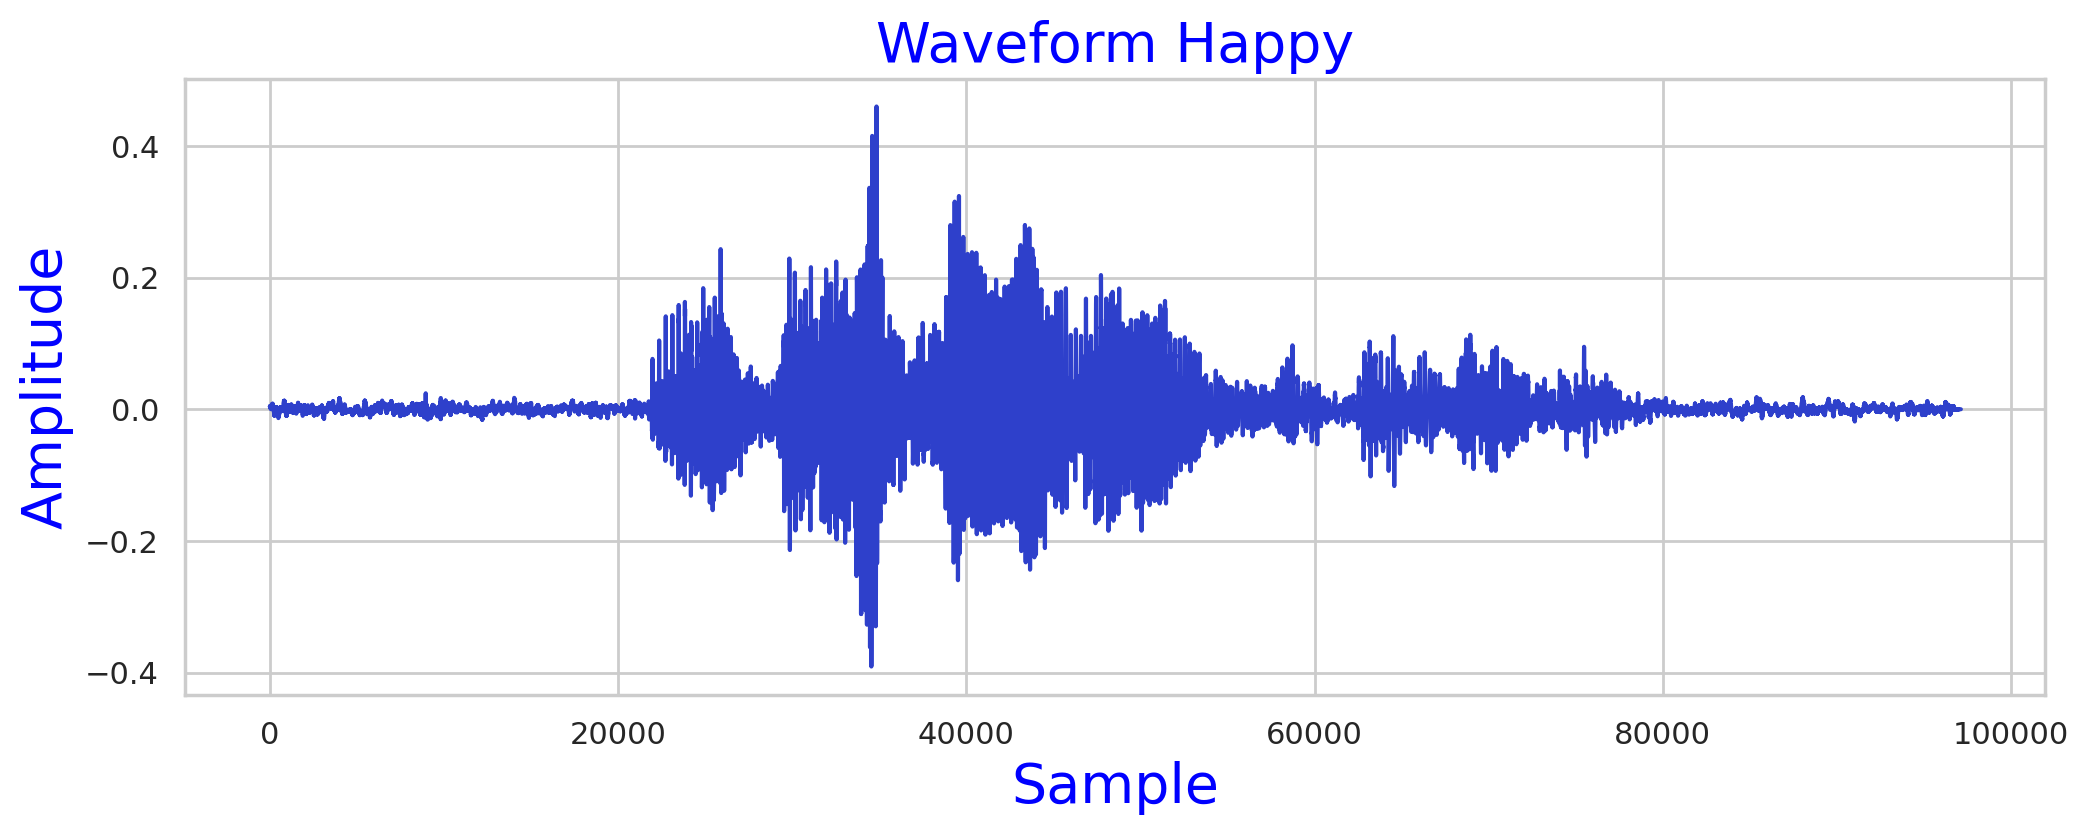

In [ ]:
happy_sp = Crema_df[Crema_df['Emotions'] == 'happy']['Path']
happy_arr = Crema_df[Crema_df['Emotions'] == 'happy']['Arrays']

plt.figure(figsize=(12, 4), dpi=200)
plt.plot(happy_arr.iloc[0], color='#2E40CB')
plt.xlabel('Sample', fontdict= font2)
plt.ylabel('Amplitude', fontdict= font2)
plt.title('Waveform Happy', fontdict= font2)
plt.show()

Audio(happy_sp.iloc[0])

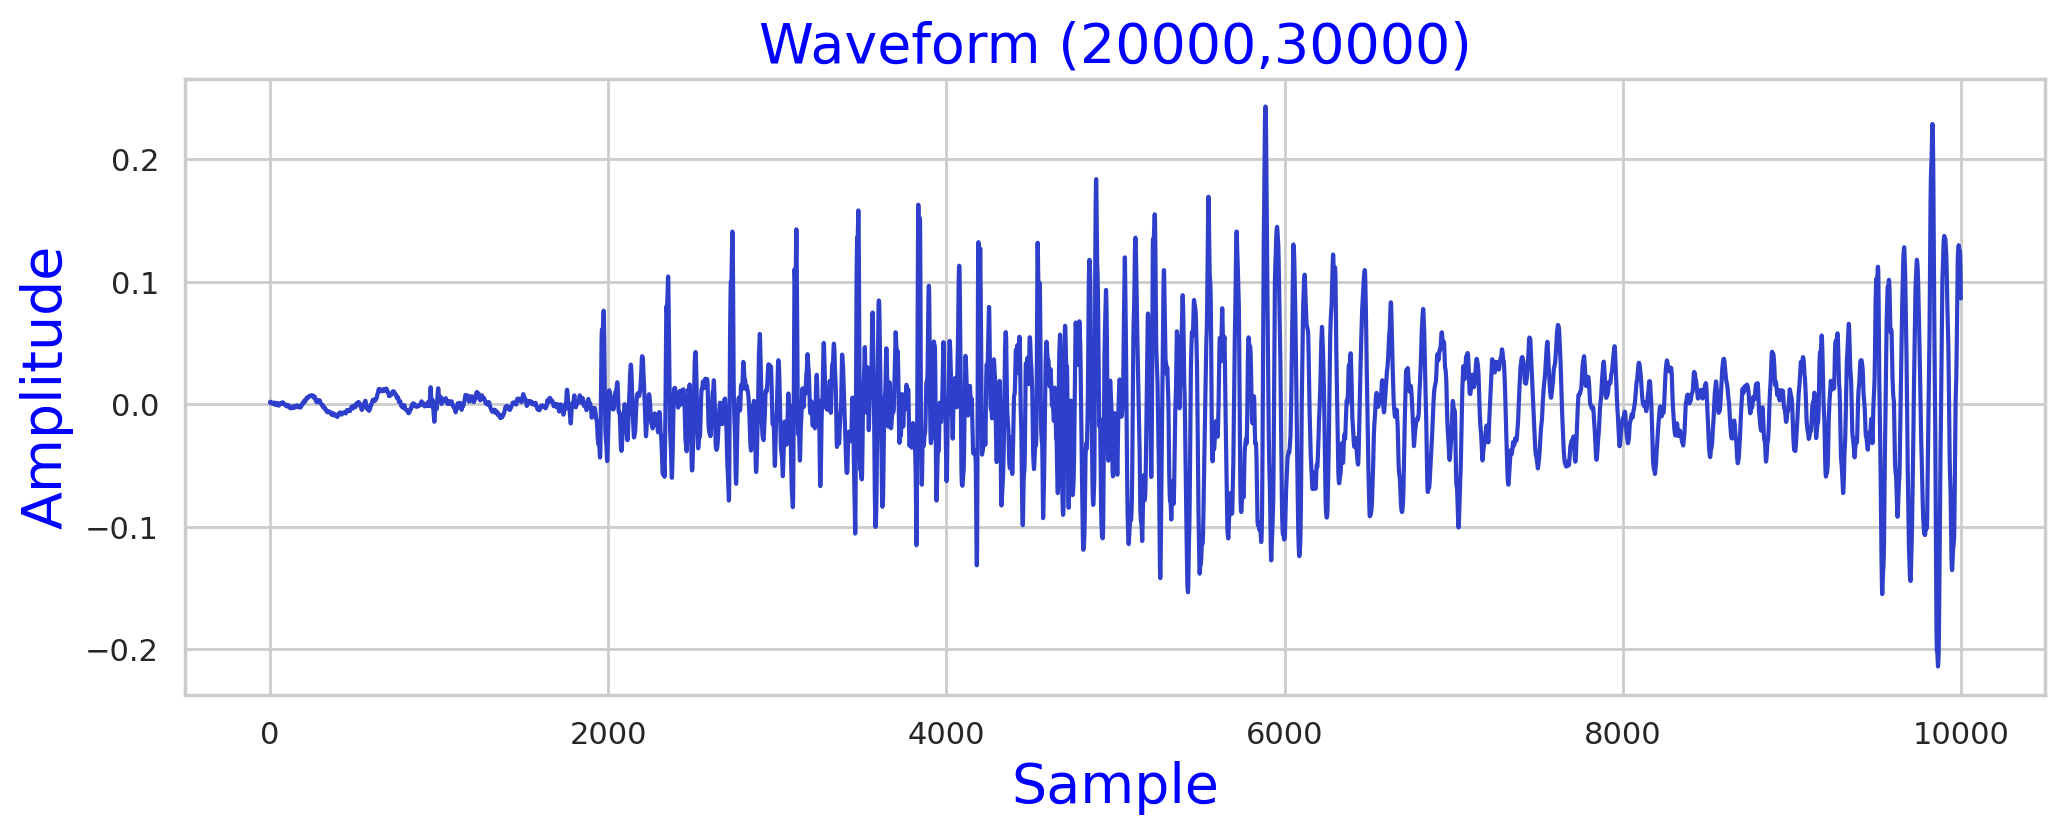

In [ ]:
plt.figure(figsize=(12, 4), dpi=200)
plt.plot(happy_arr.iloc[0][20000:30000], color='#2E40CB')
plt.xlabel('Sample', fontdict= font2)
plt.ylabel('Amplitude', fontdict= font2)
plt.title('Waveform (20000,30000)', fontdict= font2)
plt.show()

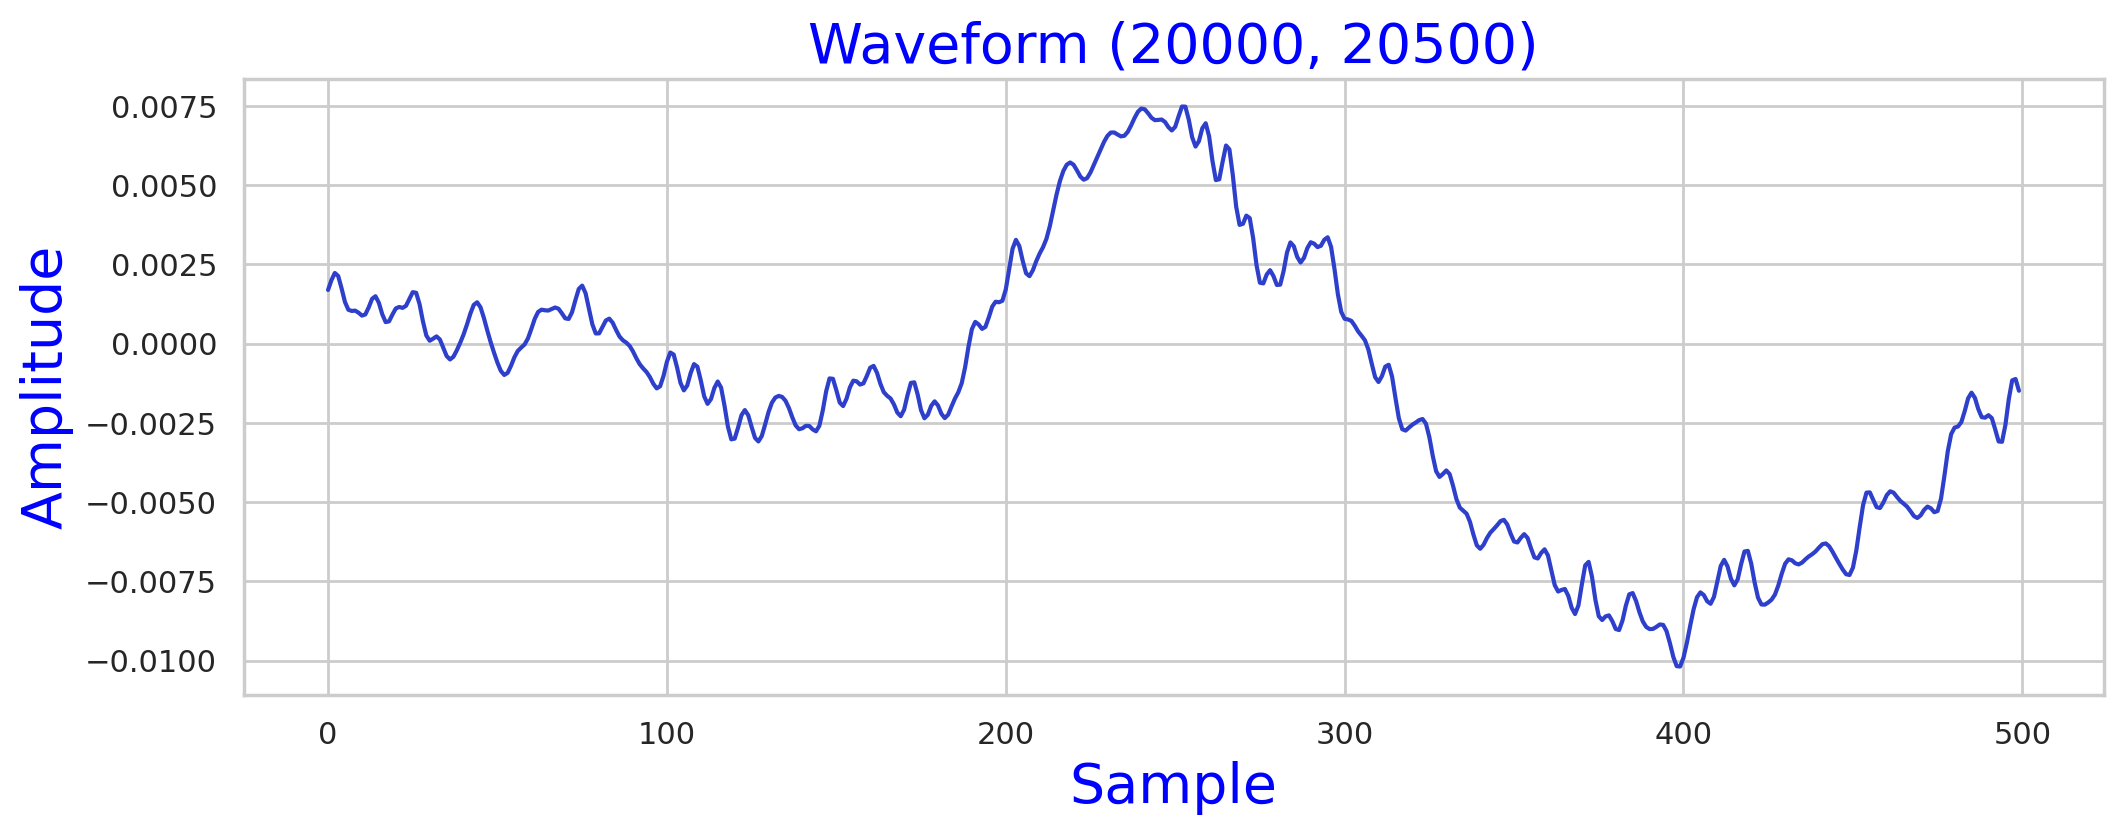

In [ ]:
plt.figure(figsize=(12, 4), dpi=200)
plt.plot(happy_arr.iloc[0][20000:20500], color='#2E40CB')
plt.xlabel('Sample', fontdict= font2)
plt.ylabel('Amplitude', fontdict= font2)
plt.title('Waveform (20000, 20500)', fontdict= font2)
plt.show()

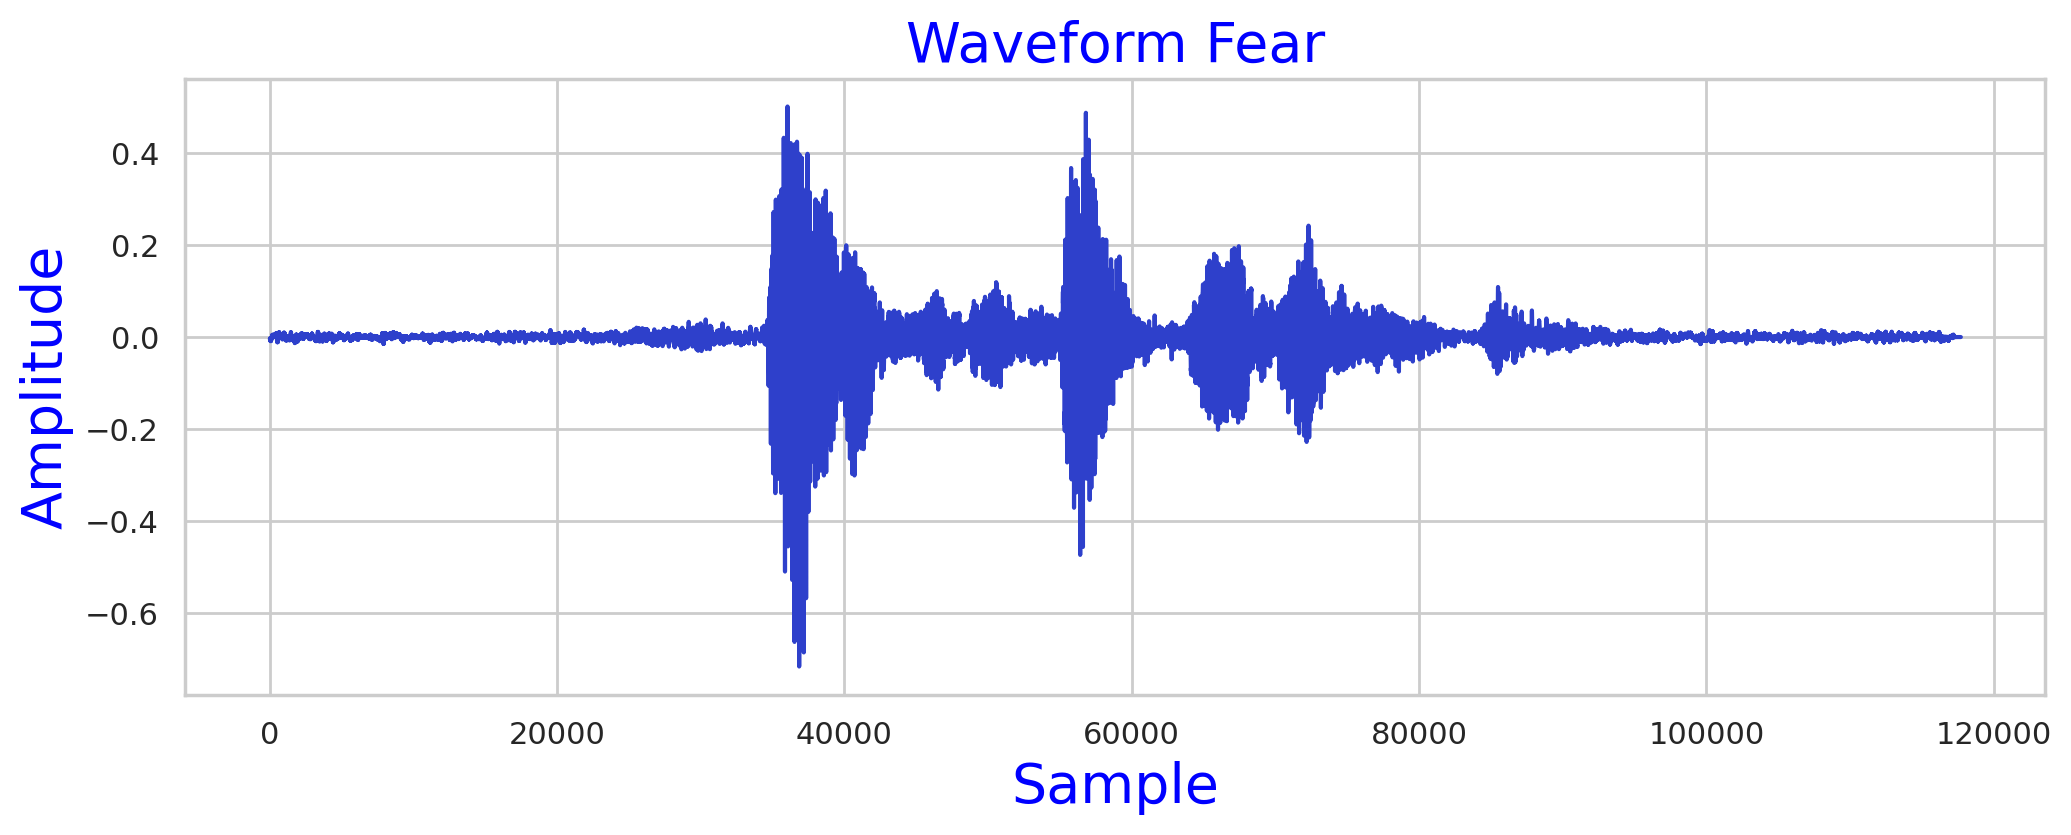

In [ ]:
fear_sp = Crema_df[Crema_df['Emotions'] == 'fear']['Path']
fear_arr = Crema_df[Crema_df['Emotions'] == 'fear']['Arrays']

plt.figure(figsize=(12, 4), dpi=200)
plt.plot(fear_arr.iloc[0], color='#2E40CB')
plt.xlabel('Sample', fontdict= font2)
plt.ylabel('Amplitude', fontdict= font2)
plt.title('Waveform Fear', fontdict= font2)
plt.show()

Audio(fear_sp.iloc[0])

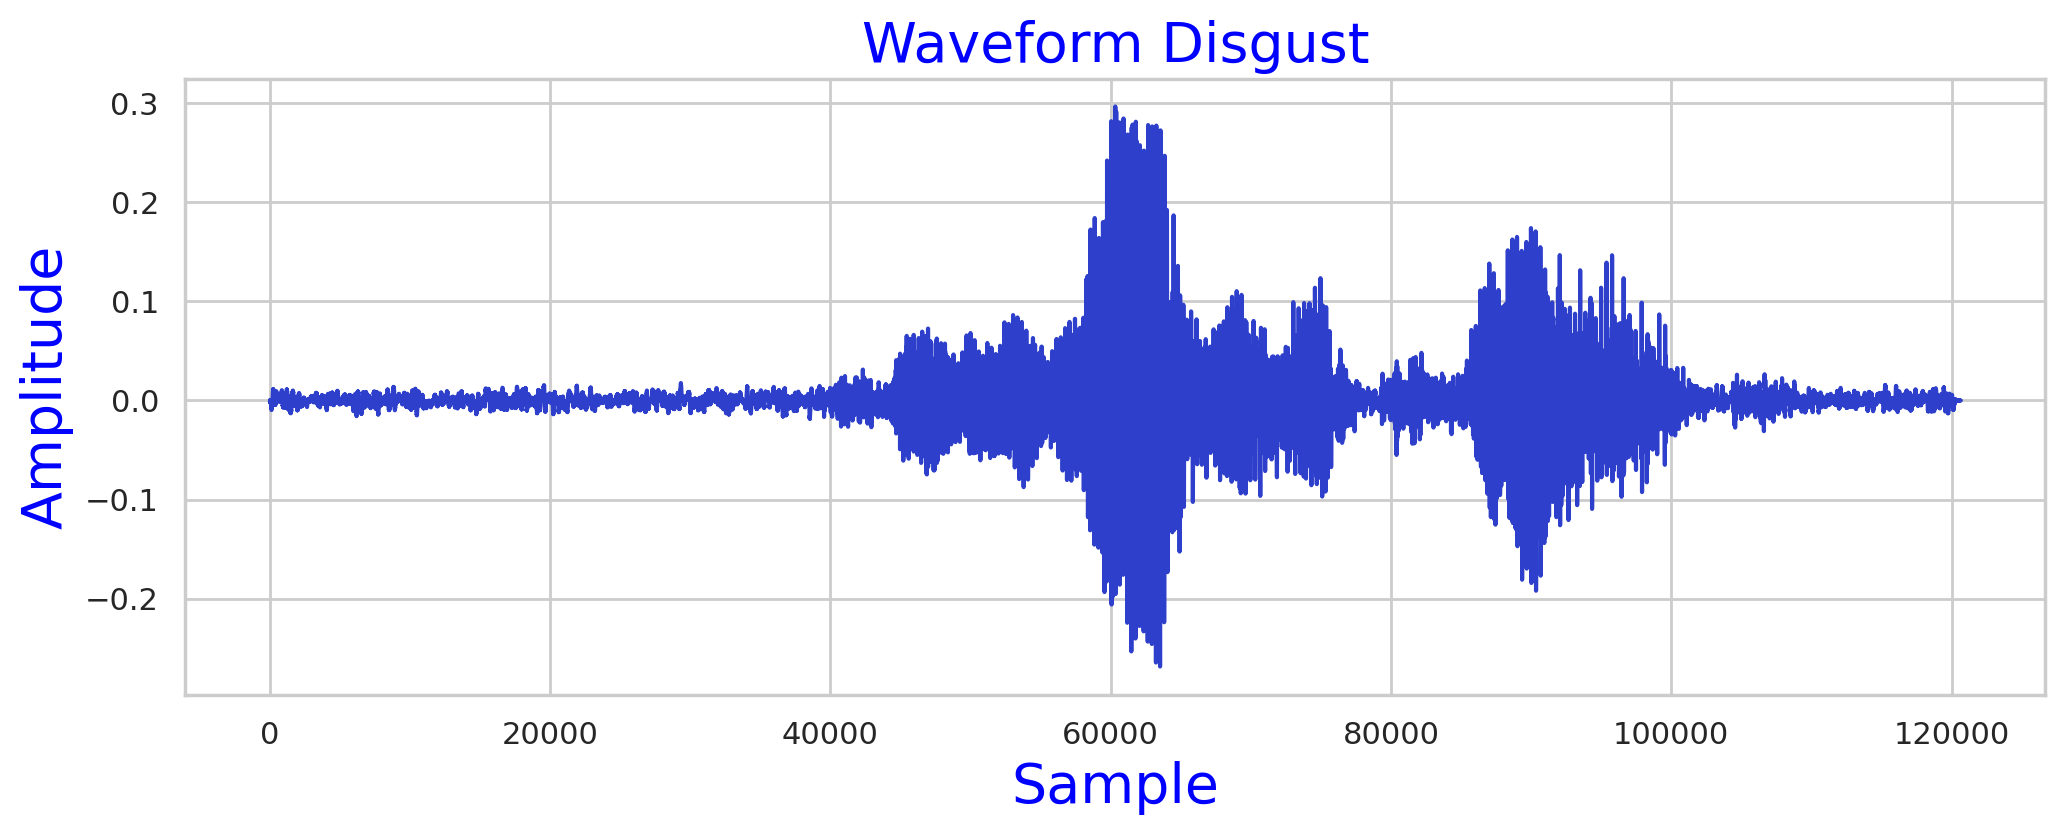

In [ ]:
disgust_sp = Crema_df[Crema_df['Emotions'] == 'disgust']['Path']
disgust_arr = Crema_df[Crema_df['Emotions'] == 'disgust']['Arrays']

plt.figure(figsize=(12, 4), dpi=200)
plt.plot(disgust_arr.iloc[0], color='#2E40CB')
plt.xlabel('Sample', fontdict= font2)
plt.ylabel('Amplitude', fontdict= font2)
plt.title('Waveform Disgust', fontdict= font2)
plt.show()

Audio(disgust_sp.iloc[0])

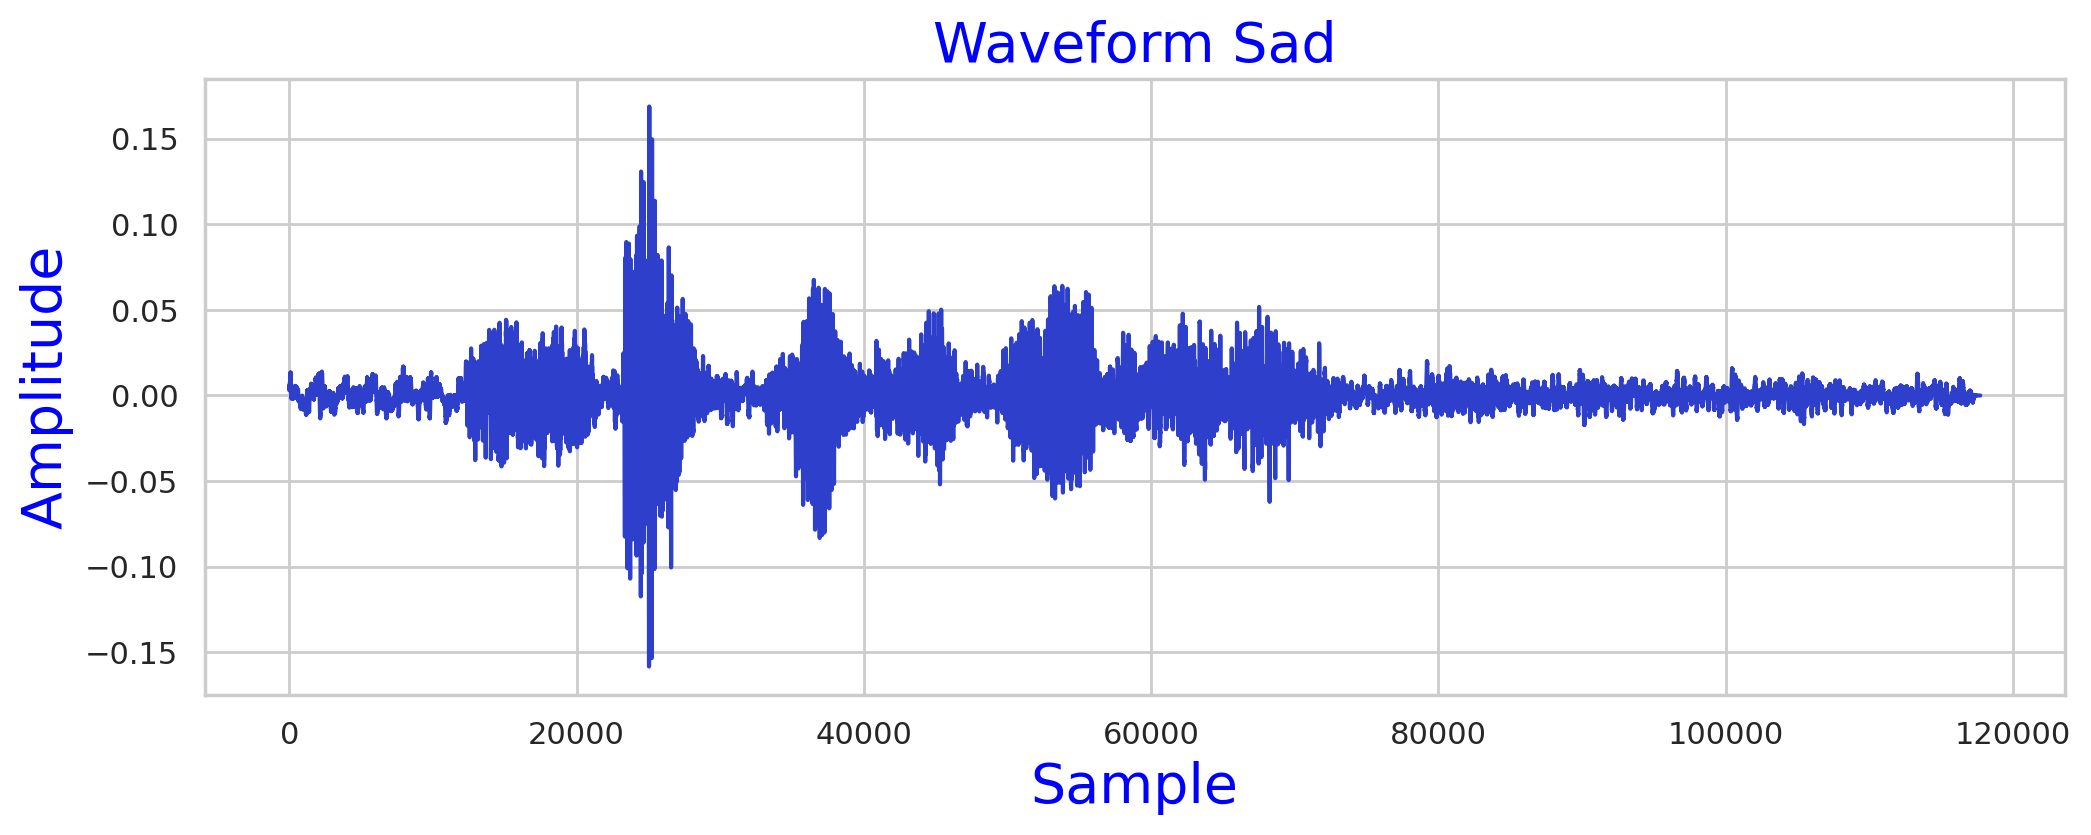

In [ ]:
sad_sp = Crema_df[Crema_df['Emotions'] == 'sad']['Path']
sad_arr = Crema_df[Crema_df['Emotions'] == 'sad']['Arrays']

plt.figure(figsize=(12, 4), dpi=200)
plt.plot(sad_arr.iloc[0], color='#2E40CB')
plt.xlabel('Sample', fontdict= font2)
plt.ylabel('Amplitude', fontdict= font2)
plt.title('Waveform Sad', fontdict= font2)
plt.show()

Audio(sad_sp.iloc[0])

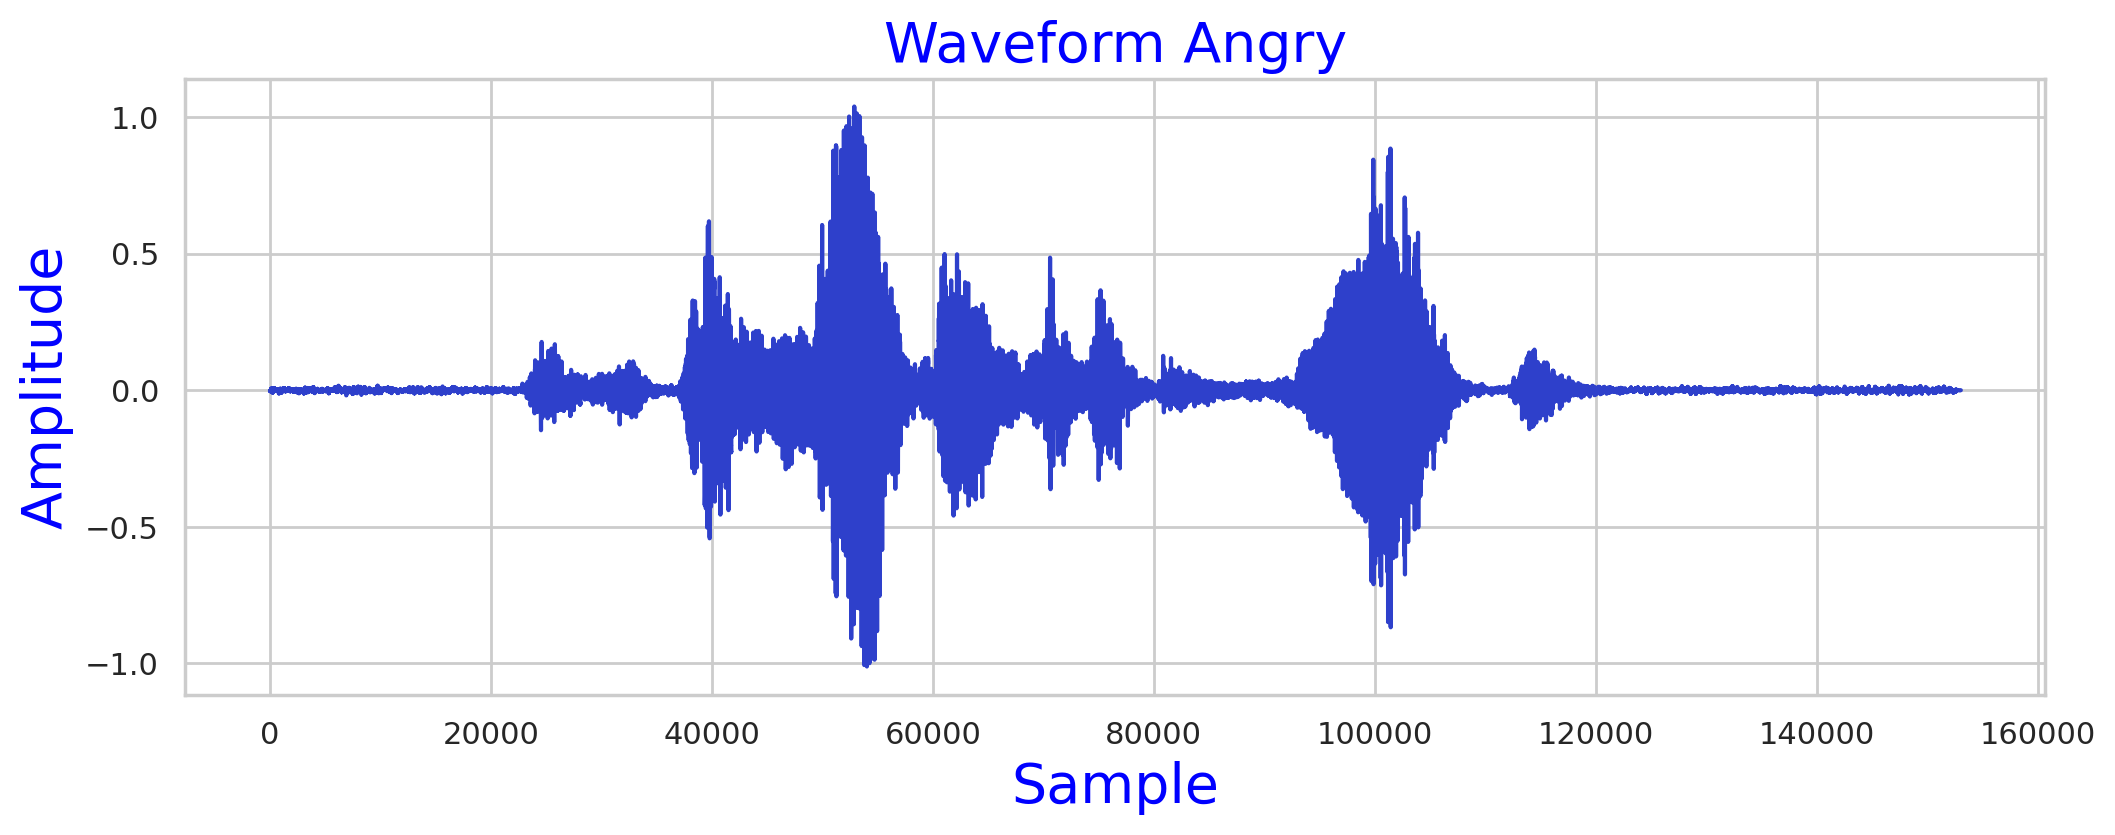

In [ ]:
angry_sp = Crema_df[Crema_df['Emotions'] == 'angry']['Path']
angry_arr = Crema_df[Crema_df['Emotions'] == 'angry']['Arrays']

plt.figure(figsize=(12, 4), dpi=200)
plt.plot(angry_arr.iloc[0], color='#2E40CB')
plt.xlabel('Sample', fontdict= font2)
plt.ylabel('Amplitude', fontdict= font2)
plt.title('Waveform Angry', fontdict= font2)
plt.show()

Audio(angry_sp.iloc[0])

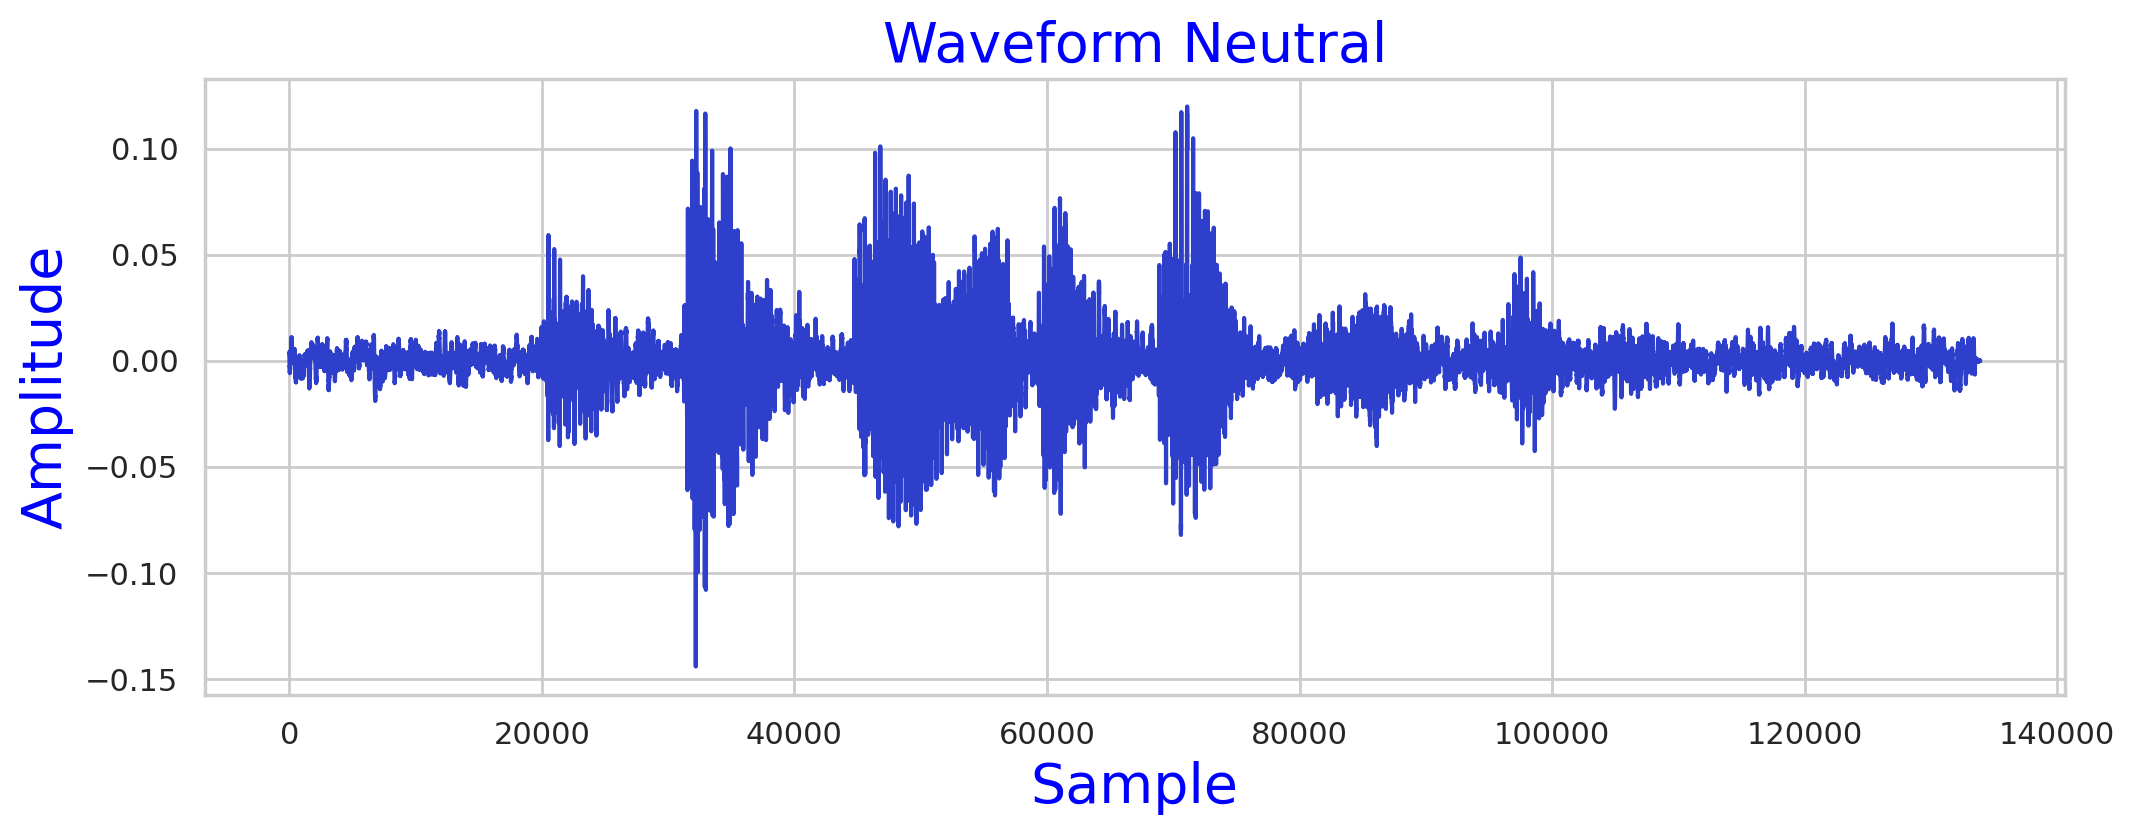

In [ ]:
neutral_sp = Crema_df[Crema_df['Emotions'] == 'neutral']['Path']
neutral_arr = Crema_df[Crema_df['Emotions'] == 'neutral']['Arrays']

plt.figure(figsize=(12, 4), dpi=200)
plt.plot(neutral_arr.iloc[0], color='#2E40CB')
plt.xlabel('Sample', fontdict= font2)
plt.ylabel('Amplitude', fontdict= font2)
plt.title('Waveform Neutral', fontdict= font2)
plt.show()

Audio(neutral_sp.iloc[0])

In [ ]:
sample_duration = 1/sr
print(sample_duration)

2.2675736961451248e-05


In [ ]:
#duration of the audio signals in seconds
duration = sample_duration * len(audio_arrays)
print(f"Duration of signal is: {duration:.2f} seconds")

Duration of signal is: 0.17 seconds


In [ ]:
Frame_size = 1024
#HOP =  Current frame how many samples shift to the right for calculating the next frame
Hop_lenght = 512

#calculate the amplitude envelope

def amplitude_env (signal, frame_size, hop_length):
    amplitude_envelope = []

    #calculate AE (Amp Env) for each frame
    for i in range (0, len(signal), hop_length):
        current_frame_amplitude_env = max(signal[i:i+frame_size])
        amplitude_envelope.append(current_frame_amplitude_env)

    return np.array(amplitude_envelope)


def fancy_amplitude_env (signal, frame_size, hop_length):

    return np.array([max(signal[i:i+frame_size]) for i in range(0, signal.size, hop_length)])

In [ ]:

Sp_fear = fear_arr.iloc[0]
Sp_disgust= disgust_arr.iloc[0]
Sp_happy= happy_arr.iloc[0]
Sp_sad = sad_arr.iloc[0]
Sp_neutral = neutral_arr.iloc[0]
Sp_angry = angry_arr.iloc[0]


In [ ]:
AE_fear = amplitude_env(Sp_fear, Frame_size, Hop_lenght)
AE_disgust = amplitude_env(Sp_disgust, Frame_size, Hop_lenght)
AE_happy = amplitude_env(Sp_happy, Frame_size, Hop_lenght)
AE_sad = amplitude_env(Sp_sad, Frame_size, Hop_lenght)
AE_neutral = amplitude_env(Sp_neutral, Frame_size, Hop_lenght)
AE_angry = amplitude_env(Sp_angry, Frame_size, Hop_lenght)


print(len(AE_fear), len(AE_disgust), len(AE_angry), len(AE_happy), len(AE_neutral)
     , len(AE_sad))

230 236 299 190 262 230


In [ ]:
fancy_AE_fear = fancy_amplitude_env(Sp_fear, Frame_size, Hop_lenght)
fancy_AE_disgust = fancy_amplitude_env(Sp_disgust, Frame_size, Hop_lenght)
fancy_AE_happy = fancy_amplitude_env(Sp_happy, Frame_size, Hop_lenght)
fancy_AE_sad = fancy_amplitude_env(Sp_sad, Frame_size, Hop_lenght)
fancy_AE_neutral = fancy_amplitude_env(Sp_neutral, Frame_size, Hop_lenght)
fancy_AE_angry = fancy_amplitude_env(Sp_angry, Frame_size, Hop_lenght)


print(len(fancy_AE_fear), len(fancy_AE_disgust), len(fancy_AE_angry),
      len(fancy_AE_happy), len(fancy_AE_neutral),
      len(fancy_AE_sad))

230 236 299 190 262 230


In [ ]:
(AE_fear == fancy_AE_fear).all()

np.True_

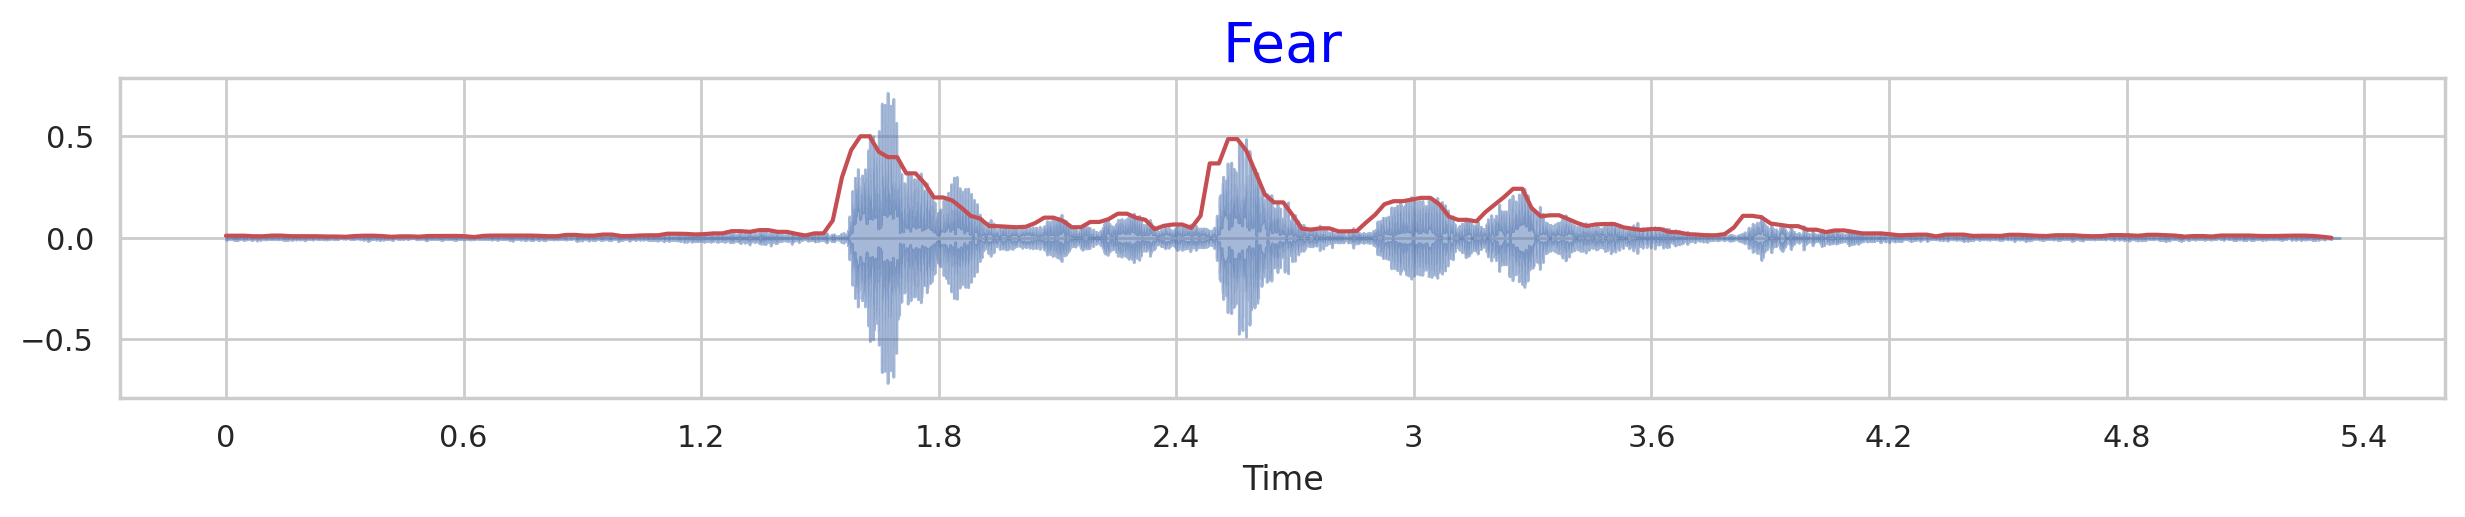

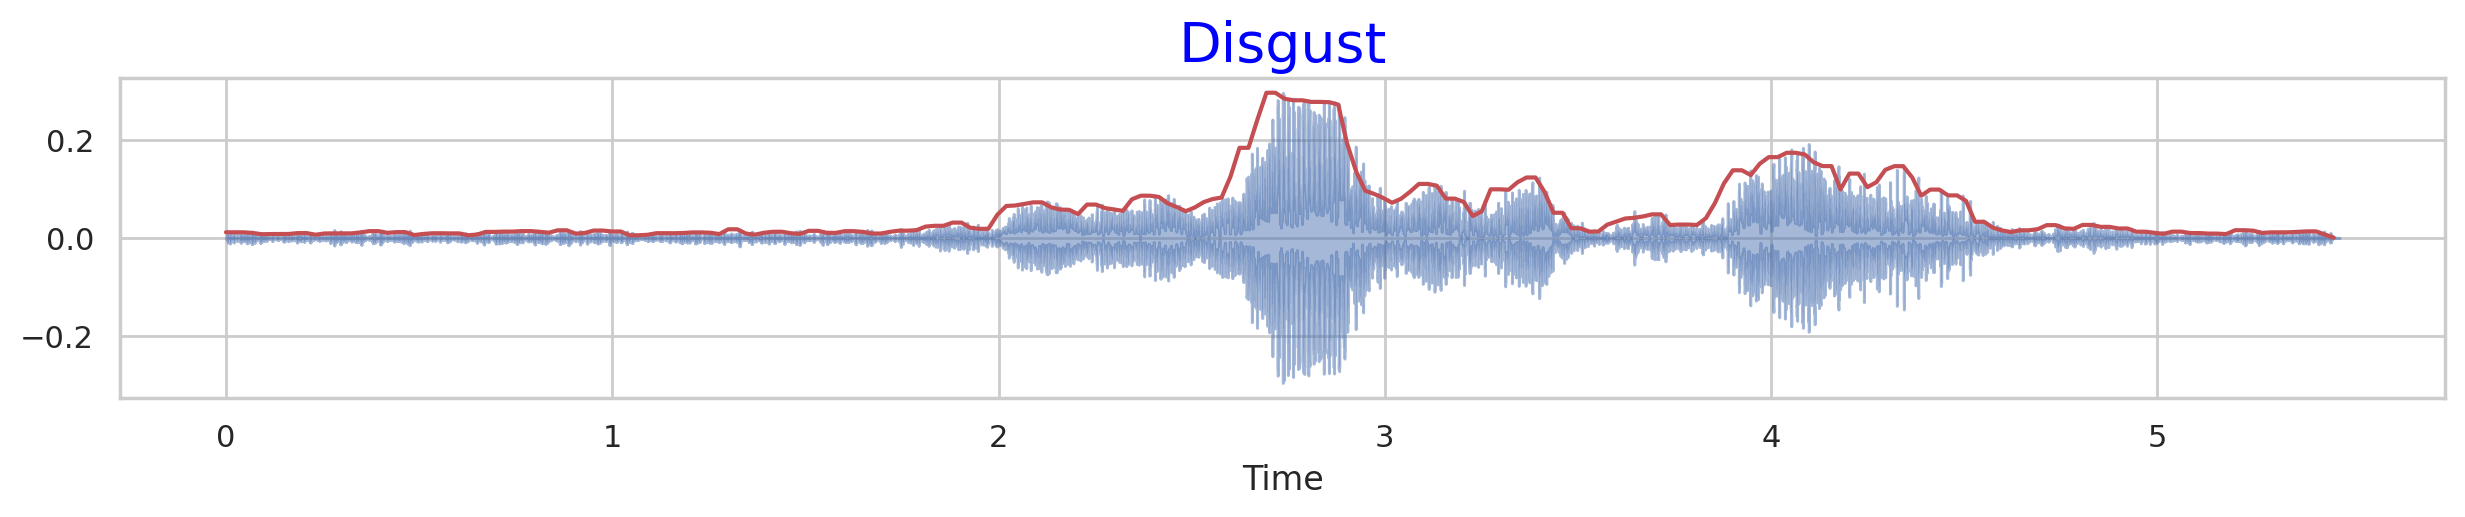

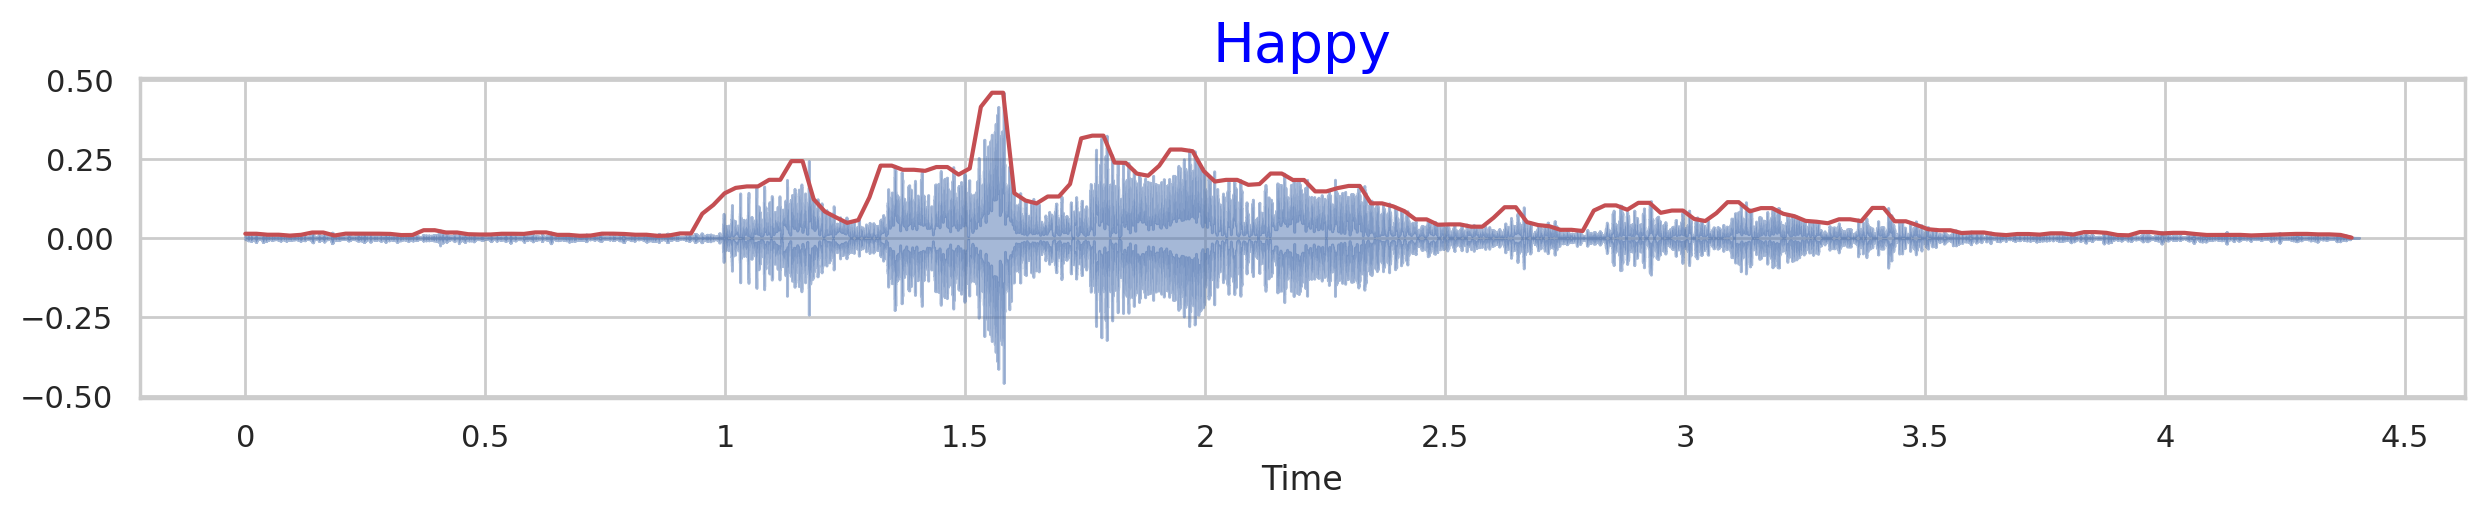

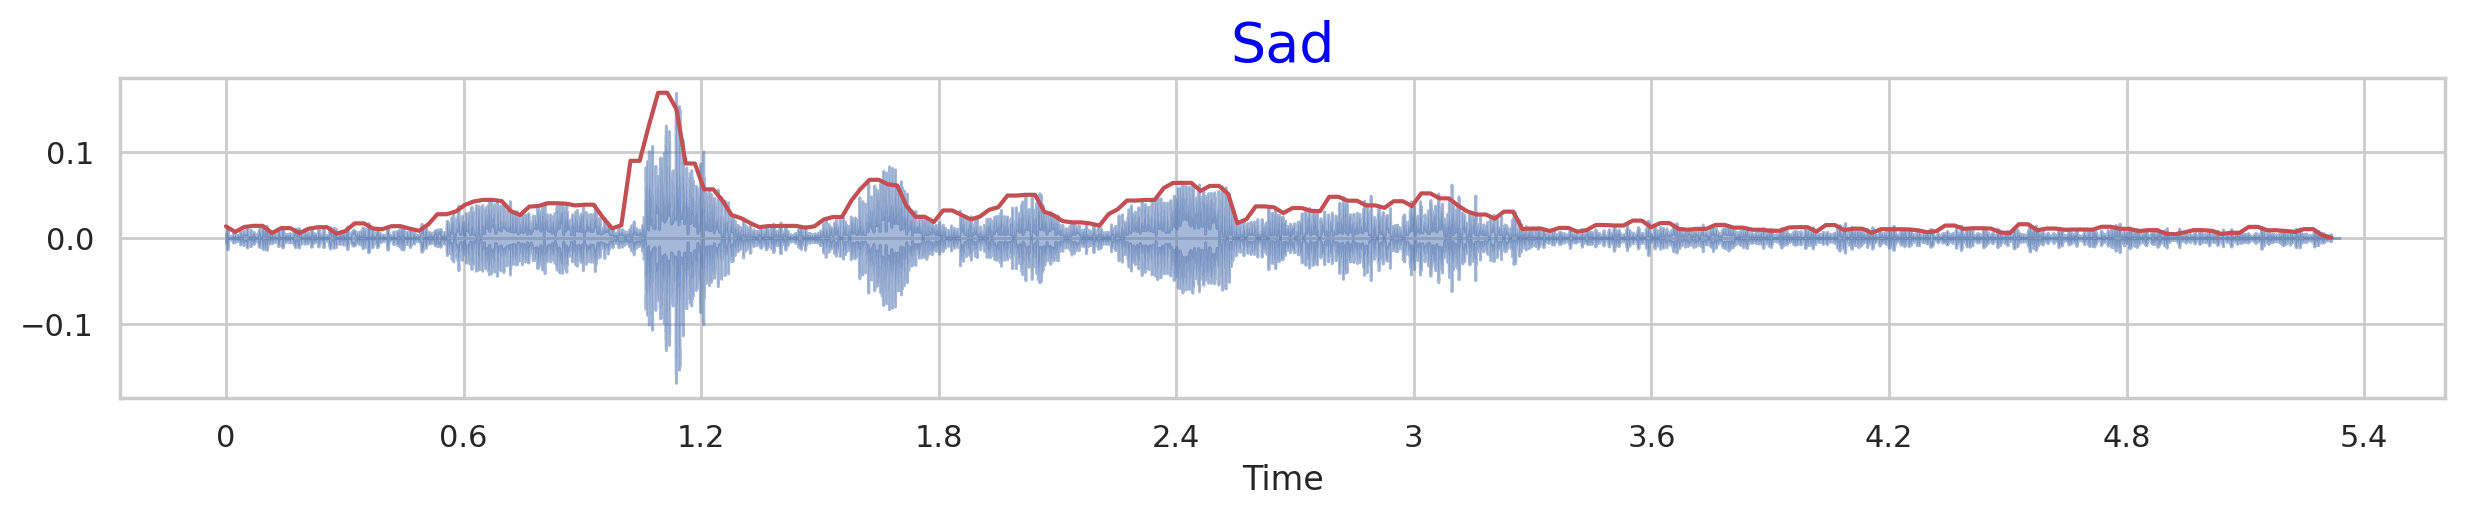

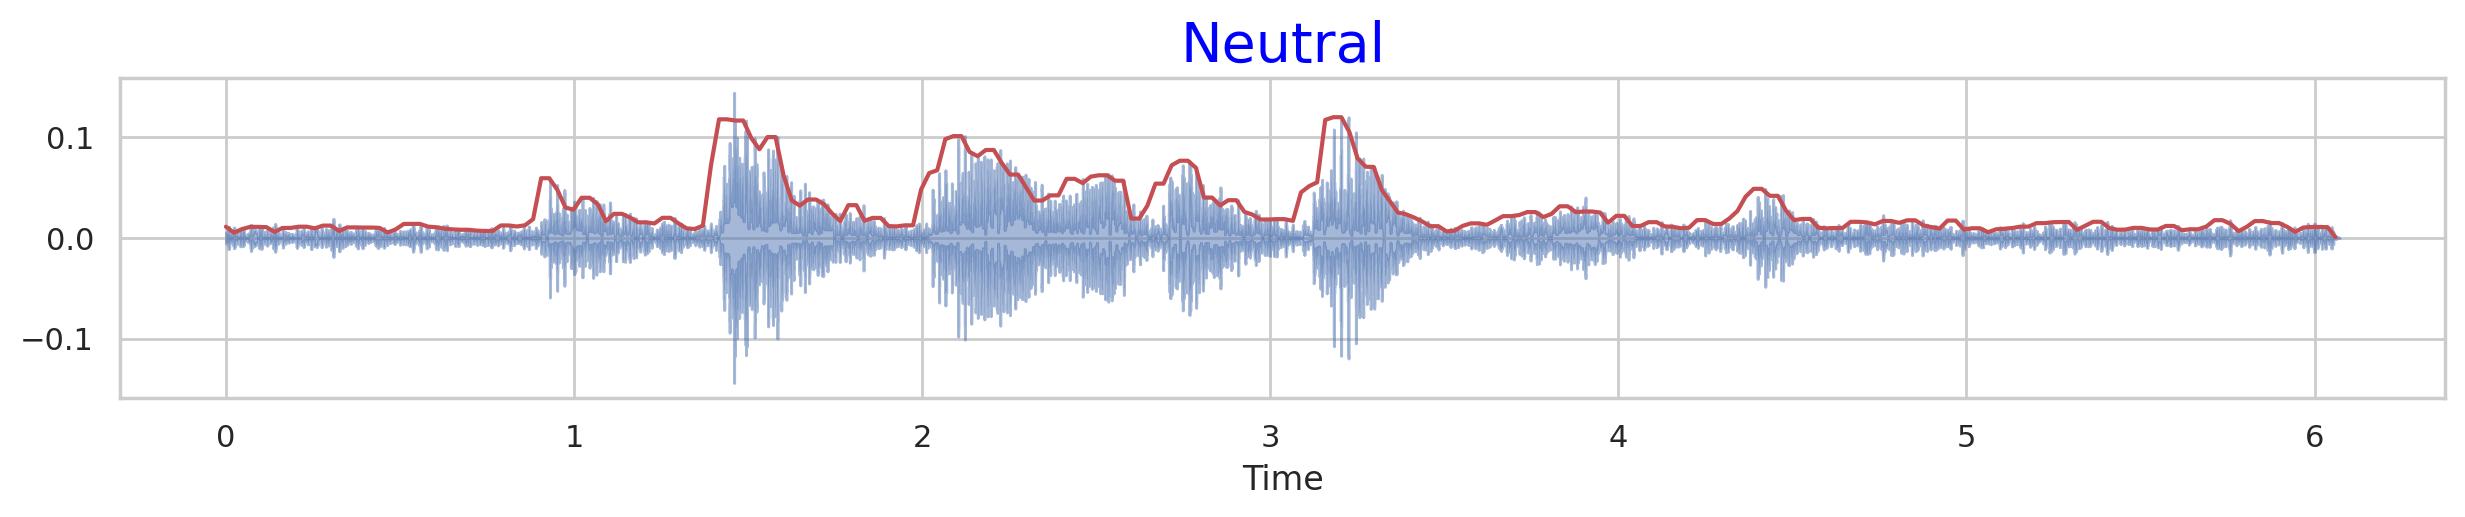

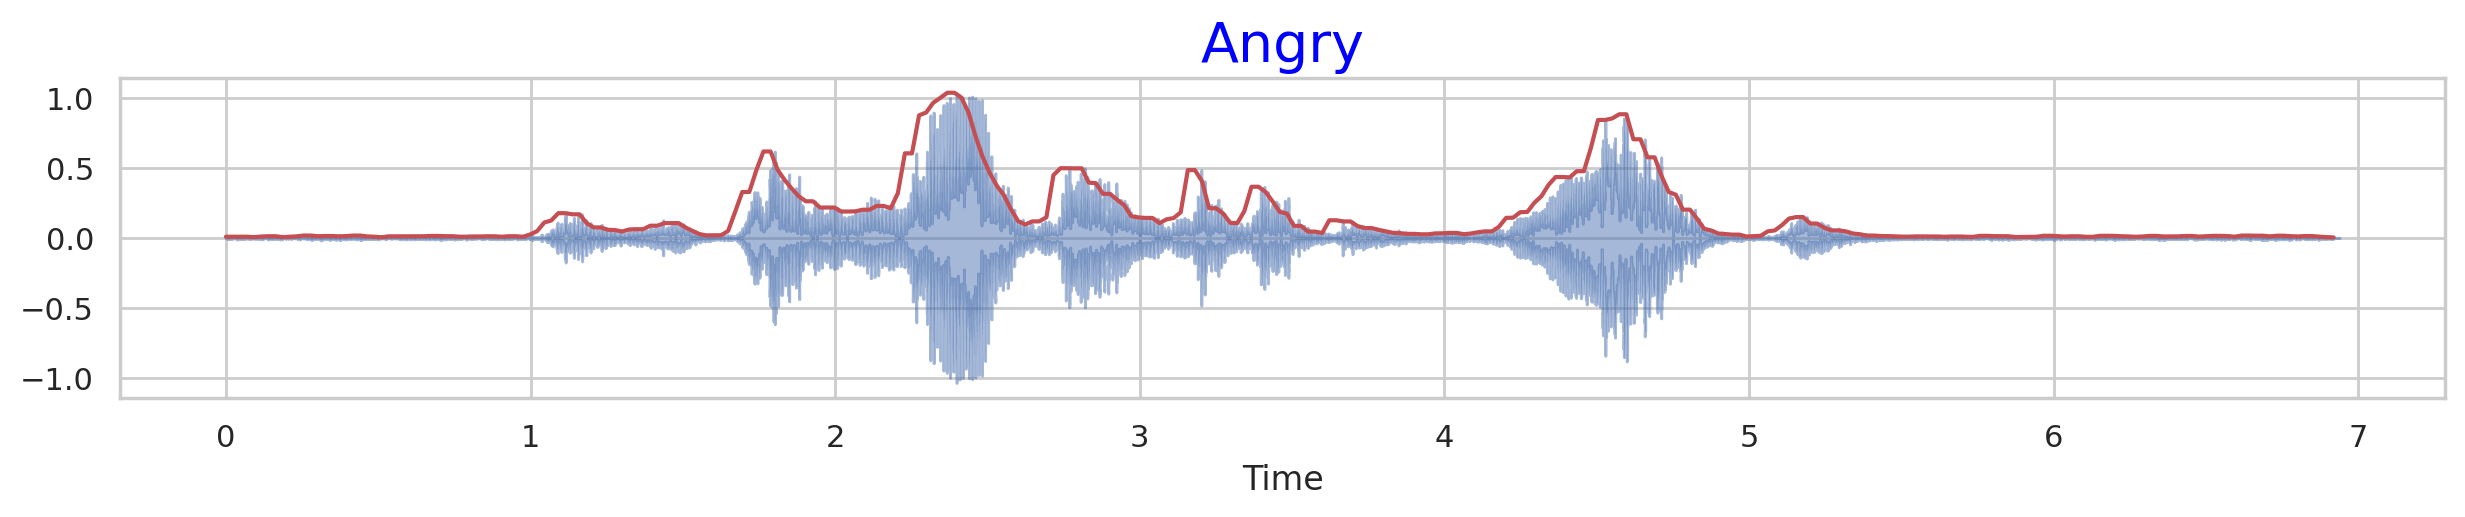

In [ ]:
frames_fear = range(0, AE_fear.size)
frames_disgust = range(0, AE_disgust.size)
frames_happy = range(0, AE_happy.size)
frames_sad = range(0, AE_sad.size)
frames_neutral = range(0, AE_neutral.size)
frames_angry = range(0, AE_angry.size)


t1 = librosa.frames_to_time(frames_fear, hop_length = Hop_lenght)
t2 = librosa.frames_to_time(frames_disgust, hop_length = Hop_lenght)
t3 = librosa.frames_to_time(frames_happy, hop_length = Hop_lenght)
t4 = librosa.frames_to_time(frames_sad, hop_length = Hop_lenght)
t5 = librosa.frames_to_time(frames_neutral, hop_length = Hop_lenght)
t6 = librosa.frames_to_time(frames_angry, hop_length = Hop_lenght)


plt.figure(figsize=(15,17), dpi=200)
plt.subplot(7,1,1)
librosa.display.waveshow(Sp_fear, alpha = 0.5)
plt.plot(t1, AE_fear, color = "r")
plt.title("Fear", fontdict= font2)
plt.show()

plt.figure(figsize=(15,17), dpi=200)
plt.subplot(7,1,2)
librosa.display.waveshow(Sp_disgust, alpha = 0.5)
plt.plot(t2, AE_disgust, color = "r")
plt.title("Disgust", fontdict= font2)
plt.show()

plt.figure(figsize=(15,17), dpi=200)
plt.subplot(7,1,3)
librosa.display.waveshow(Sp_happy, alpha = 0.5)
plt.plot(t3, AE_happy, color = "r")
plt.title("Happy", fontdict= font2)
plt.show()

plt.figure(figsize=(15,17), dpi=200)
plt.subplot(7,1,4)
librosa.display.waveshow(Sp_sad, alpha = 0.5)
plt.plot(t4, AE_sad, color = "r")
plt.title("Sad", fontdict= font2)
plt.show()


plt.figure(figsize=(15,17), dpi=200)
plt.subplot(7,1,5)
librosa.display.waveshow(Sp_neutral, alpha = 0.5)
plt.plot(t5, AE_neutral, color = "r")
plt.title("Neutral", fontdict= font2)
plt.show()

plt.figure(figsize=(15,17), dpi=200)
plt.subplot(7,1,6)
librosa.display.waveshow(Sp_angry, alpha = 0.5)
plt.plot(t6, AE_angry, color = "r")
plt.title("Angry", fontdict= font2)
plt.show()



In [ ]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data



def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate=0.8)


# taking any example and checking for techniques.
path = np.array(Crema_df.Path)[1]
data, sample_rate = librosa.load(path)

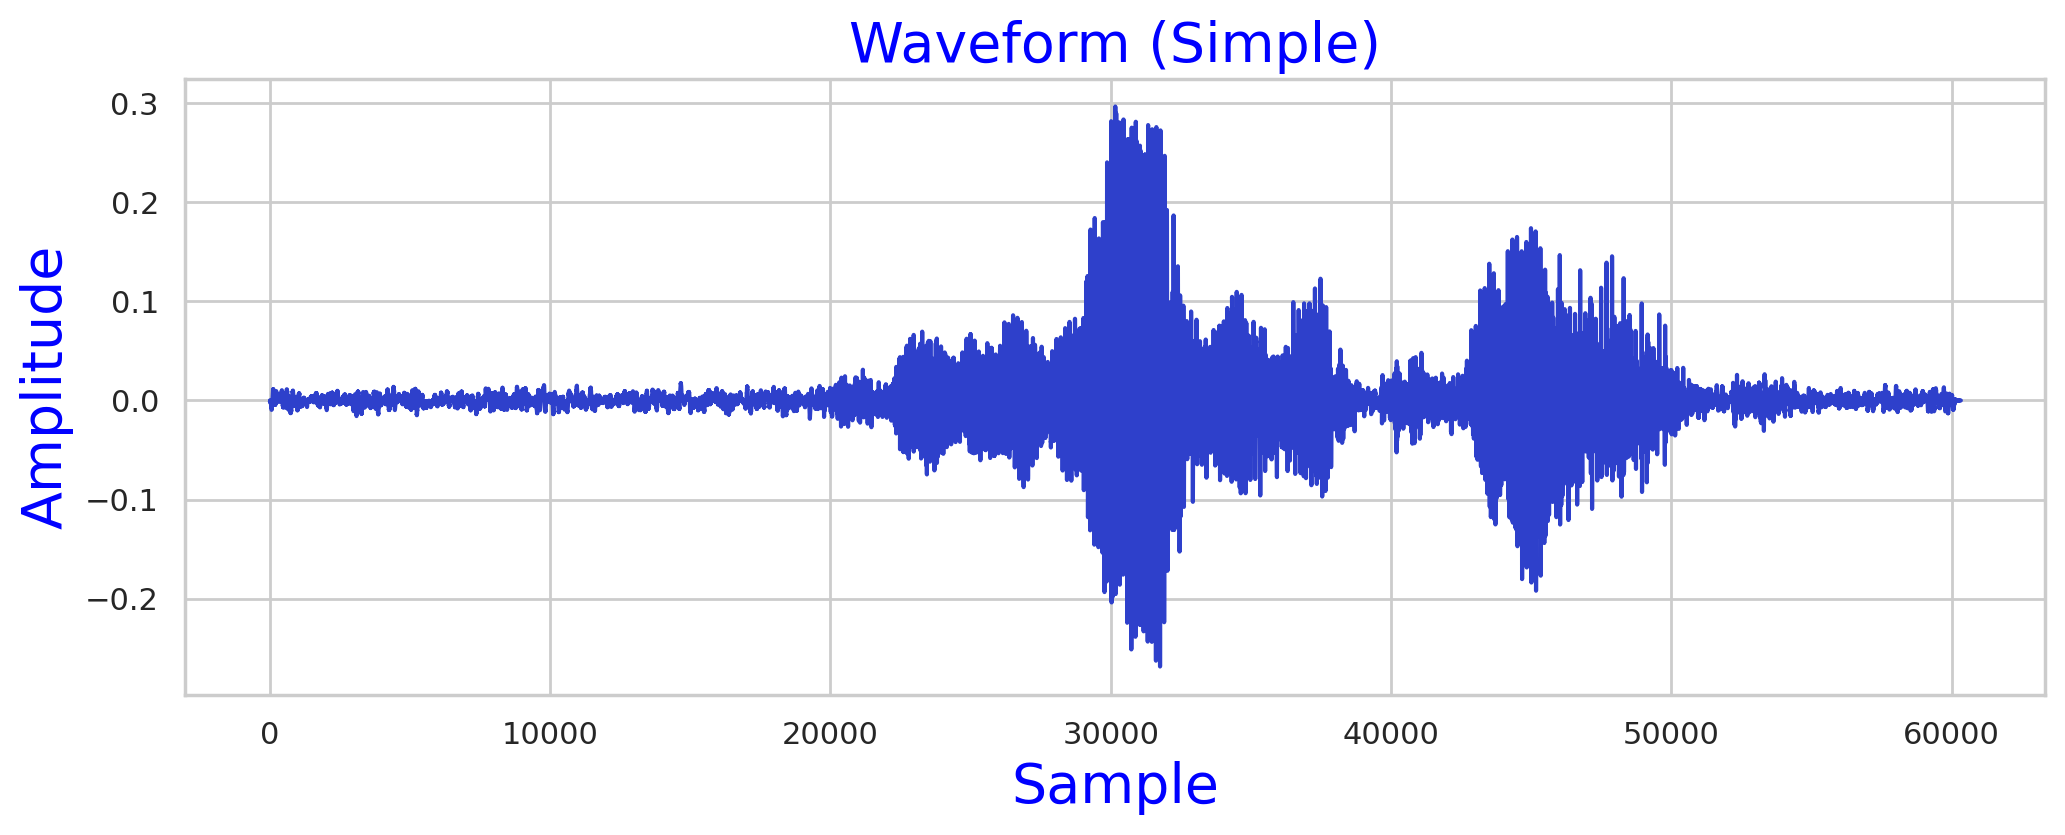

In [ ]:
Simple_data = data
plt.figure(figsize=(12, 4), dpi=200)
plt.plot(Simple_data ,color='#2E40CB')
plt.xlabel('Sample', fontdict= font2)
plt.ylabel('Amplitude', fontdict= font2)
plt.title('Waveform (Simple)', fontdict= font2)
plt.show()

Audio(Simple_data, rate=sample_rate)

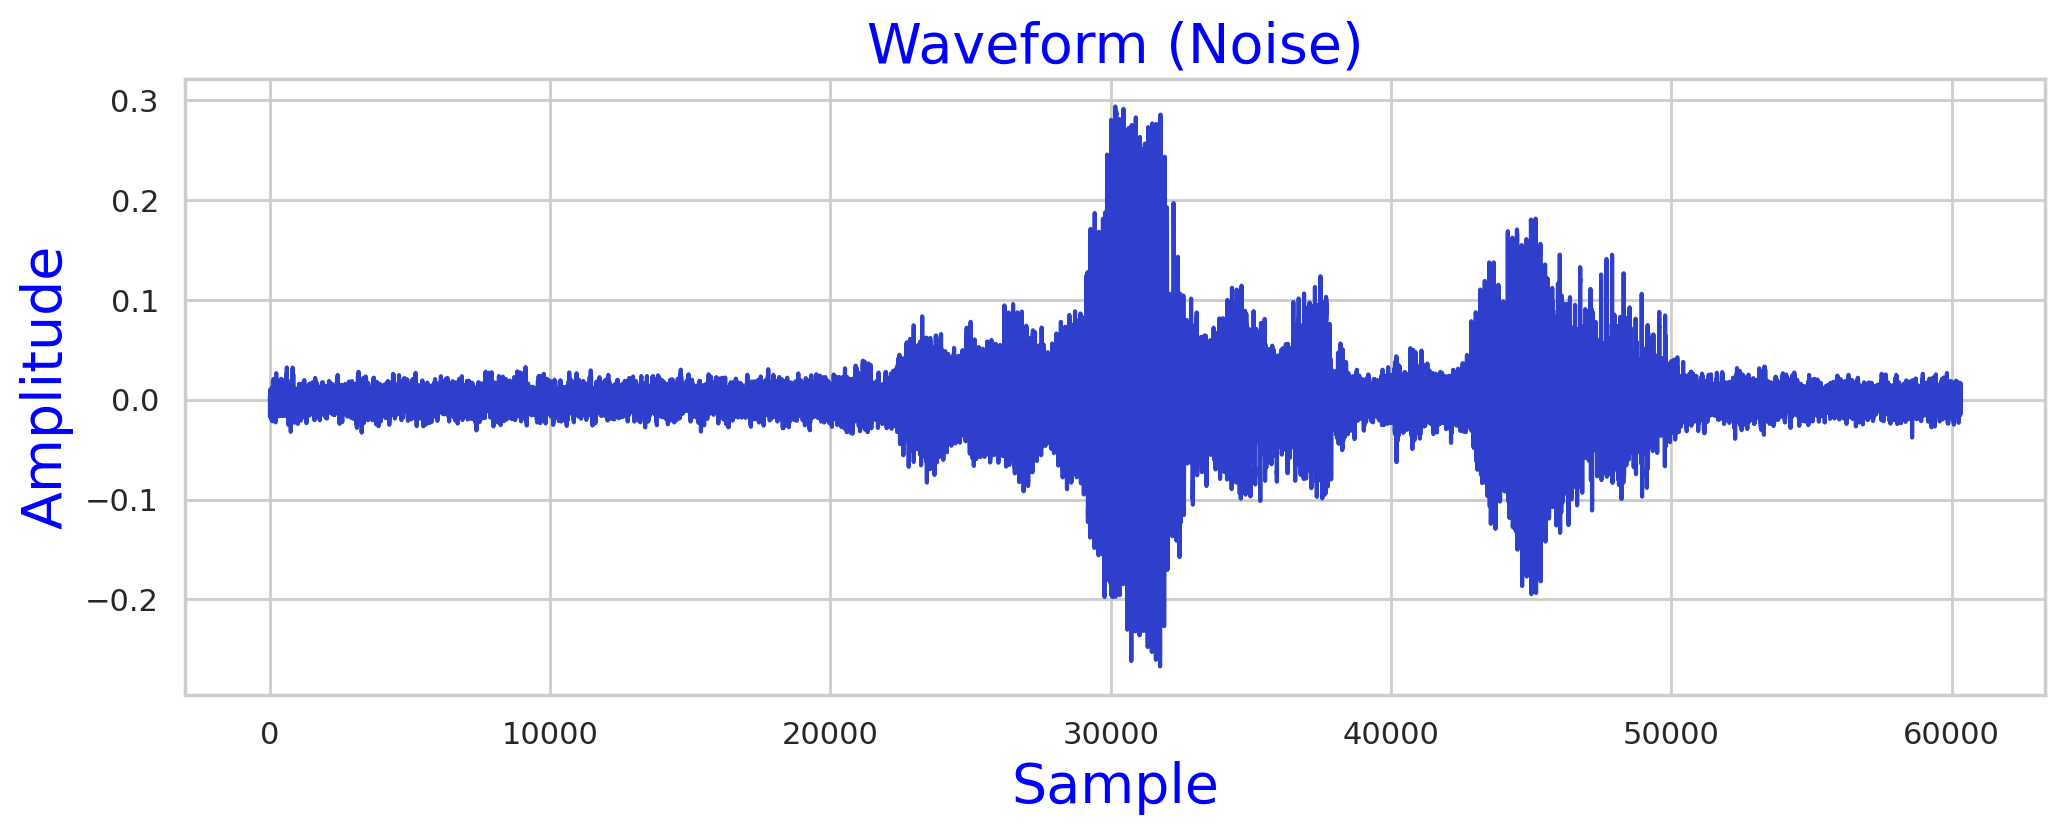

In [ ]:
Noise_data = noise(data)
plt.figure(figsize=(12, 4), dpi=200)
plt.plot(Noise_data ,color='#2E40CB')
plt.xlabel('Sample', fontdict= font2)
plt.ylabel('Amplitude', fontdict= font2)
plt.title('Waveform (Noise)', fontdict= font2)
plt.show()

Audio(Noise_data, rate=sample_rate)

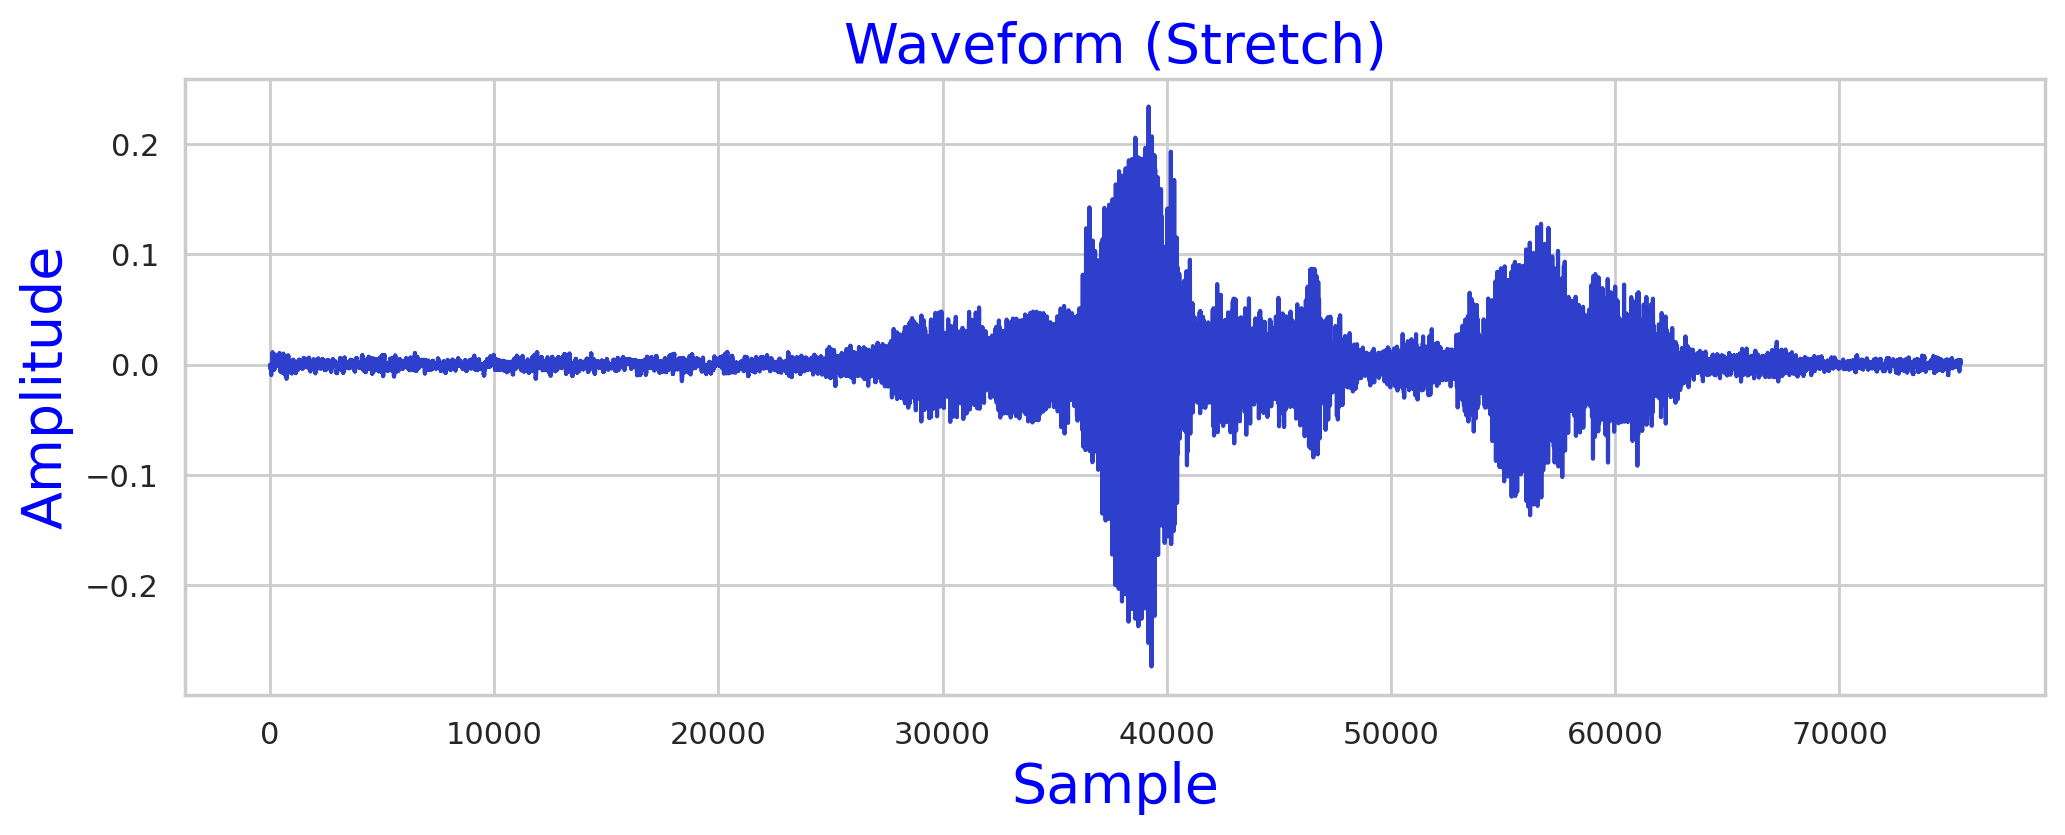

In [ ]:
Stretch_data = stretch(data)
plt.figure(figsize=(12, 4), dpi=200)
plt.plot(Stretch_data ,color='#2E40CB')
plt.xlabel('Sample', fontdict= font2)
plt.ylabel('Amplitude', fontdict= font2)
plt.title('Waveform (Stretch)', fontdict= font2)
plt.show()

Audio(Stretch_data, rate=sample_rate)

In [ ]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration = 3, offset = 0.5)
    mfcc = np.mean(librosa.feature.mfcc(y = y, sr = sr, n_mfcc = 40).T, axis = 0)
    return mfcc

In [ ]:
extract_mfcc(Crema_df['Path'][0])

array([-3.2640408e+02,  1.1067440e+02, -5.3479190e+00,  4.9593689e+01,
       -7.5781741e+00,  9.7641172e+00, -1.3716146e+01,  8.3093567e+00,
       -7.4433570e+00, -1.0797507e+00, -3.7939990e+00, -2.7507386e+00,
        4.3449273e+00, -8.2536650e+00,  3.9254832e+00, -1.1968194e+01,
        9.1862060e-02, -8.9619513e+00, -7.9028144e+00, -2.5384407e+00,
       -6.2884355e+00, -7.8471560e+00, -7.0161891e+00,  4.9258084e+00,
        3.1126127e+00,  1.0324039e+01,  4.7123413e+00,  6.0274520e+00,
       -1.8704347e-01, -2.1763327e+00,  2.1056173e+00,  1.6954838e+00,
        3.2016859e+00, -3.4598870e+00, -2.1678154e-01,  2.0545061e+00,
        4.8891897e+00, -4.4516891e-01, -2.5090082e+00, -3.9723194e+00],
      dtype=float32)

In [ ]:
%%time
X_mfcc = Crema_df['Path'].apply(lambda x: extract_mfcc(x))

CPU times: user 4min 18s, sys: 3.51 s, total: 4min 22s
Wall time: 3min 6s


In [ ]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(7430, 40)

In [ ]:
X = np.expand_dims(X, -1)
X.shape

(7430, 40, 1)

In [ ]:
enc = OneHotEncoder()
y = enc.fit_transform(Crema_df[['Emotions']])

In [ ]:
y = y.toarray()

In [ ]:
model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(6, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
print(Iterable)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 256)            │       264,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 305,734 (1.17 MB)

 Trainable params: 305,734 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

<class 'collections.abc.Iterable'>


In [ ]:
checkpoint_filepath = 'best_model.keras'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_best_only=True,
    monitor='val_accuracy',
    mode='max',
    verbose=1)


def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

lr_scheduler_callback = LearningRateScheduler(scheduler)

history = model.fit(X, y, validation_split=0.2, epochs=100, batch_size=64)


Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 21s 184ms/step - accuracy: 0.1987 - loss: 1.7643 - val_accuracy: 0.2423 - val_loss: 1.7650
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 16s 177ms/step - accuracy: 0.2967 - loss: 1.6214 - val_accuracy: 0.2510 - val_loss: 1.7188
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 22s 189ms/step - accuracy: 0.3293 - loss: 1.5674 - val_accuracy: 0.2813 - val_loss: 1.6589
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 20s 180ms/step - accuracy: 0.3586 - loss: 1.5266 - val_accuracy: 0.3176 - val_loss: 1.7934
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 20s 180ms/step - accuracy: 0.3753 - loss: 1.4824 - val_accuracy: 0.2988 - val_loss: 1.7928
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 22s 200ms/step - accuracy: 0.3725 - loss: 1.5014 - val_accuracy: 0.3351 - val_loss: 1.7944
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 19s 179ms/step - accuracy: 0.3925 - loss: 1.4525 - val_accuracy: 0.3163 - val_loss: 1.8128
Epoch 8/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 21s 181ms/step - accuracy: 0.4020 - loss: 1.4472 - 

In [ ]:
# ... (your existing code) ...

# Before training the model:
from sklearn.model_selection import train_test_split

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)  # 20% for validation

# Train the model using X_train and y_train:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=64)  # Use validation_data

# After training the model:

# Get metrics for the first 20 epochs
epochs = list(range(20))  # Assuming you trained for 100 epochs total
acc = history.history['accuracy'][:20]  # Get accuracy for first 20 epochs
val_acc = history.history['val_accuracy'][:20]  # Get validation accuracy for first 20 epochs

# Calculate F1-score for each epoch
f1_scores = []
for epoch in range(len(epochs)):
    y_pred = model.predict(X_val)  # Get predictions for validation set
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_val, axis=1)
    f1_weighted = f1_score(y_true_classes, y_pred_classes, average='weighted')
    f1_scores.append(f1_weighted)

# Plot accuracy and F1-score for the first 20 epochs
plt.figure(figsize=(12, 4), dpi=200)
plt.plot(epochs, acc, label='train accuracy', color='#2E40CB')
plt.plot(epochs, val_acc, label='validation accuracy', color='#FF6B6B')  # Plot validation accuracy
plt.plot(epochs, f1_scores, label='weighted F1-score', color='#00CC96')  # Plot F1-score
plt.xlabel('epochs', fontdict=font2)
plt.ylabel('metrics', fontdict=font2)  # Changed y-axis label
plt.title('Accuracy and F1-Score (First 20 Epochs)', fontdict=font2)  # Changed title
plt.legend()
plt.show()

# Print accuracy and F1-score for each epoch
for epoch in range(len(epochs)):
    print(f"Epoch {epoch + 1}: Accuracy = {acc[epoch]:.4f}, Validation Accuracy = {val_acc[epoch]:.4f}, F1-Score = {f1_scores[epoch]:.4f}")

# ... (rest of your code) ...

Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 18s 199ms/step - accuracy: 0.8099 - loss: 0.8381 - val_accuracy: 0.8392 - val_loss: 0.5532
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 19s 180ms/step - accuracy: 0.8603 - loss: 0.4721 - val_accuracy: 0.8358 - val_loss: 0.5240
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 20s 179ms/step - accuracy: 0.8658 - loss: 0.4160 - val_accuracy: 0.8318 - val_loss: 0.5457
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 20s 178ms/step - accuracy: 0.8759 - loss: 0.3456 - val_accuracy: 0.8190 - val_loss: 0.5882
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 20s 178ms/step - accuracy: 0.8908 - loss: 0.3233 - val_accuracy: 0.8062 - val_loss: 0.6569
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 17s 179ms/step - accuracy: 0.8958 - loss: 0.3232 - val_accuracy: 0.8223 - val_loss: 0.6409
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 21s 181ms/step - accuracy: 0.8996 - loss: 0.2986 - val_accuracy: 0.8149 - val_loss: 0.6527
Epoch 8/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 20s 179ms/step - accuracy: 0.9013 - loss: 0.2978 - 

In [ ]:
epochs = list(range(500))
acc = history.history['accuracy']

plt.figure(figsize=(12, 4), dpi=200)
plt.plot(epochs, acc, label='train accuracy', color='#2E40CB')
plt.xlabel('epochs', fontdict= font2)
plt.ylabel('accuracy', fontdict= font2)
plt.title('Acc', fontdict= font2)
plt.legend()
plt.show()

In [ ]:
loss = history.history['loss']

plt.figure(figsize=(12, 4), dpi=200)
plt.plot(epochs, loss, label='train loss', color='#2E40CB')
plt.xlabel('epochs', fontdict= font2)
plt.ylabel('loss', fontdict= font2)
plt.title('Loss', fontdict= font2)
plt.show()

In [ ]:
# Plot training accuracy and test accuracy
epochs = list(range(100))  # Assuming you trained for 100 epochs
acc = history.history['accuracy']

plt.figure(figsize=(12, 4), dpi=200)
plt.plot(epochs, [test_acc] * len(epochs), label='test accuracy', color='#FF6B6B', linestyle='--')
plt.xlabel('epochs', fontdict=font2)
plt.ylabel('accuracy', fontdict=font2)
plt.title('Accuracies', fontdict=font2)  # Changed title to reflect both accuracies
plt.legend()
plt.show()

# Print test accuracy
print(f"Test Accuracy: {test_acc:.4f}")

In [ ]:
val_loss = history.history['val_loss']

plt.figure(figsize=(12, 4), dpi=200)
plt.plot(epochs, val_loss, label='test loss', color='#CB2E3F')
plt.xlabel('epochs', fontdict=font2)
plt.ylabel('loss', fontdict=font2)
plt.title('test Loss', fontdict=font2)
plt.show()